# Danny Mathieson Applied Data Science with Python Project 2

In [1]:
# Initialize packages, import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
date_cols = ['Created Date','Closed Date','Due Date','Resolution Action Updated Date']
df = pd.read_csv('datasets/customer_service_requests_dataset.csv', parse_dates=date_cols)

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_40972/1495364041.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/customer_service_requests_dataset.csv', parse_dates=date_cols)


In [3]:
print(df.dtypes)

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

## Question 1 - Understanding the Dataset

### A - Identify the Shape of the Dataset

In [4]:
print(df.shape)

(364558, 53)


### B - Identify variables with Null Values

In [5]:
df_na_count = df.isna().sum()
df_na_count = df_na_count[df_na_count > 0].sort_values(ascending=False)
print(df_na_count)
na_cols = list(df_na_count.index)

School or Citywide Complaint      364558
Vehicle Type                      364558
Taxi Company Borough              364558
Taxi Pick Up Location             364558
Garage Lot Name                   364558
Ferry Direction                   364557
Ferry Terminal Name               364556
Bridge Highway Segment            364296
Road Ramp                         364296
Bridge Highway Direction          364261
Bridge Highway Name               364261
Landmark                          364183
Intersection Street 2             314046
Intersection Street 1             313438
Cross Street 2                     57805
Cross Street 1                     57188
Street Name                        51699
Incident Address                   51699
Descriptor                          6501
Latitude                            4030
Longitude                           4030
Y Coordinate (State Plane)          4030
Location                            4030
X Coordinate (State Plane)          4030
Address Type    

## Question 2 - Basic Exploratory Data Analysis

### A - Utilize Missing Value Treatment

In [6]:
# Describe each column and list distinct values
# Top 20 dict helpful for later missing value treatment
top_20_check = {}
for c in na_cols:
    print(f'\n\n{c}:\n{df[[c]].describe()}\nNulls\t\t{df_na_count[c]}\nTop 20 Values:\n{df[[c]].value_counts().head(20)}\nTop 20 sum:\n{df[[c]].value_counts()[:19].sum()}')
    if df_na_count[c] > df[[c]].value_counts()[:19].sum() and c not in date_cols:
        top_20_check[c] = df[[c]].value_counts()[:19].sum()
        
print(top_20_check)



School or Citywide Complaint:
       School or Citywide Complaint
count                           0.0
mean                            NaN
std                             NaN
min                             NaN
25%                             NaN
50%                             NaN
75%                             NaN
max                             NaN
Nulls		364558
Top 20 Values:
Series([], dtype: int64)
Top 20 sum:
0


Vehicle Type:
       Vehicle Type
count           0.0
mean            NaN
std             NaN
min             NaN
25%             NaN
50%             NaN
75%             NaN
max             NaN
Nulls		364558
Top 20 Values:
Series([], dtype: int64)
Top 20 sum:
0


Taxi Company Borough:
       Taxi Company Borough
count                   0.0
mean                    NaN
std                     NaN
min                     NaN
25%                     NaN
50%                     NaN
75%                     NaN
max                     NaN
Nulls		364558
Top 20 Values:
Series(



Intersection Street 1:
       Intersection Street 1
count                  51120
unique                  4704
top                 BROADWAY
freq                     757
Nulls		313438
Top 20 Values:
Intersection Street 1
BROADWAY                 757
170 STREET               506
6 AVENUE                 379
44 STREET                362
EAST   46 STREET         347
85 STREET                252
5 AVENUE                 244
78 AVENUE                228
AMSTERDAM AVENUE         217
FULTON STREET            201
3 AVENUE                 192
2 AVENUE                 189
7 AVENUE                 188
1 AVENUE                 179
ATLANTIC AVENUE          175
EAST   14 STREET         164
MYRTLE AVENUE            163
NOSTRAND AVENUE          158
10 AVENUE                150
EAST  173 STREET         150
dtype: int64
Top 20 sum:
5051


Cross Street 2:
       Cross Street 2
count          306753
unique           6064
top              BEND
freq             5376
Nulls		57805
Top 20 Values:
Cross Street 



X Coordinate (State Plane):
       X Coordinate (State Plane)
count                3.605280e+05
mean                 1.005043e+06
std                  2.196362e+04
min                  9.133570e+05
25%                  9.919460e+05
50%                  1.003470e+06
75%                  1.019134e+06
max                  1.067186e+06
Nulls		4030
Top 20 Values:
X Coordinate (State Plane)
1021327.0                     1023
1000812.0                      662
1037000.0                      639
1000311.0                      605
1042290.0                      400
985450.0                       390
991981.0                       389
997044.0                       380
982967.0                       346
988313.0                       339
935996.0                       315
1006310.0                      309
999046.0                       281
992467.0                       278
990833.0                       269
988749.0                       269
1003271.0                      266
988846.0       

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_40972/2005871193.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(f'\n\n{c}:\n{df[[c]].describe()}\nNulls\t\t{df_na_count[c]}\nTop 20 Values:\n{df[[c]].value_counts().head(20)}\nTop 20 sum:\n{df[[c]].value_counts()[:19].sum()}')




Resolution Action Updated Date:
       Resolution Action Updated Date
count                          362156
unique                         340833
top               2015-12-19 08:35:28
freq                                3
first             2015-01-01 00:20:33
last              2016-01-03 16:22:52
Nulls		2402
Top 20 Values:
Resolution Action Updated Date
2015-12-19 08:35:28               3
2015-05-01 22:02:31               2
2015-08-25 18:56:33               2
2015-03-07 14:38:54               2
2015-08-25 18:36:42               2
2015-06-17 00:46:33               2
2015-03-07 14:53:33               2
2015-06-17 00:46:31               2
2015-03-07 15:02:58               2
2015-08-25 15:37:39               2
2015-11-18 10:14:34               2
2015-03-07 15:07:09               2
2015-03-07 15:09:18               2
2015-03-07 15:11:24               2
2015-03-07 15:12:28               2
2015-08-25 19:15:43               2
2015-06-17 01:05:31               2
2015-08-25 17:57:32           

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_40972/2005871193.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(f'\n\n{c}:\n{df[[c]].describe()}\nNulls\t\t{df_na_count[c]}\nTop 20 Values:\n{df[[c]].value_counts().head(20)}\nTop 20 sum:\n{df[[c]].value_counts()[:19].sum()}')




Closed Date:
                Closed Date
count                362177
unique               339837
top     2015-09-10 07:12:49
freq                      3
first   2015-01-01 00:20:33
last    2016-01-03 16:22:52
Nulls		2381
Top 20 Values:
Closed Date        
2015-09-10 07:12:49    3
2015-05-07 12:12:11    2
2015-10-22 00:58:52    2
2015-06-28 22:58:51    2
2015-12-03 22:33:29    2
2015-06-28 22:58:56    2
2015-04-14 14:45:11    2
2015-06-28 22:58:58    2
2015-04-14 14:45:14    2
2015-12-03 22:43:59    2
2015-10-22 00:50:25    2
2015-02-14 04:07:54    2
2015-12-03 22:47:13    2
2015-04-14 14:49:30    2
2015-06-28 23:01:11    2
2015-06-28 23:01:13    2
2015-12-03 22:15:30    2
2015-12-03 22:49:25    2
2015-02-14 03:51:03    2
2015-08-13 16:12:28    2
dtype: int64
Top 20 sum:
39


Location Type:
          Location Type
count            364425
unique               18
top     Street/Sidewalk
freq             301372
Nulls		133
Top 20 Values:
Location Type             
Street/Sidewalk         

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_40972/2005871193.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(f'\n\n{c}:\n{df[[c]].describe()}\nNulls\t\t{df_na_count[c]}\nTop 20 Values:\n{df[[c]].value_counts().head(20)}\nTop 20 sum:\n{df[[c]].value_counts()[:19].sum()}')




Due Date:
                   Due Date
count                364555
unique               362015
top     2015-06-04 06:16:23
freq                      3
first   2015-01-01 08:00:50
last    2016-01-01 07:59:45
Nulls		3
Top 20 Values:
Due Date           
2015-06-17 06:24:30    3
2015-08-09 06:25:07    3
2015-08-16 06:49:03    3
2015-06-04 06:16:23    3
2015-06-22 00:41:03    3
2015-07-23 08:40:29    3
2015-05-03 07:08:54    3
2015-10-27 16:33:33    3
2015-09-11 05:19:51    3
2015-08-18 06:05:08    3
2015-12-24 02:33:50    3
2015-07-16 15:21:55    3
2015-02-12 06:56:36    3
2015-03-02 06:27:37    3
2015-05-10 05:32:57    3
2015-08-08 01:07:42    3
2015-08-09 06:16:46    3
2015-05-03 00:31:36    2
2015-06-23 15:08:48    2
2015-05-26 07:51:06    2
dtype: int64
Top 20 sum:
55


School Zip:
         School Zip
count        364557
unique            1
top     Unspecified
freq         364557
Nulls		1
Top 20 Values:
School Zip 
Unspecified    364557
dtype: int64
Top 20 sum:
364557


School Code:
 

In [7]:
# identify columns that either:
total_cols = df_na_count.size

In [8]:
# 1: Remove columns that are all nulls
none_removal_cols = df_na_count[df_na_count == df.shape[0]]
print(f'1:\n{none_removal_cols}\nPct of Total Cols\t{round(none_removal_cols.shape[0]/total_cols*100.0,2)}%')

top_20_check = {key: top_20_check[key] for key in top_20_check if key not in none_removal_cols.index}
df_na_count.drop(none_removal_cols.index, inplace=True)
df.drop(none_removal_cols.index, axis=1, inplace=True)

1:
School or Citywide Complaint    364558
Vehicle Type                    364558
Taxi Company Borough            364558
Taxi Pick Up Location           364558
Garage Lot Name                 364558
dtype: int64
Pct of Total Cols	14.29%


In [9]:
# 2: Can replace missing values with "none" because 
#     a: the vast majority of entries are null (>= 50%)
#     b: Null makes up more occurrences than the top 20 occurring members combined (excluding date columns)
none_replacement_cols_a = df_na_count[df_na_count/df.shape[0] >= 0.5]
none_replacement_cols_b = df_na_count.loc[top_20_check.keys()]
none_replacement_cols = pd.concat([none_replacement_cols_a, none_replacement_cols_b]).to_frame('Nulls').reset_index(names=['Column']).drop_duplicates()
print(f'2:\n{none_replacement_cols}\nPct of Total Cols\t{round(none_replacement_cols.shape[0]/total_cols*100.0,2)}%')
none_replacement_dict = {c: 'None' for c in none_replacement_cols.Column}
df_na_count.drop(none_replacement_dict.keys(), inplace=True)
df.fillna(value=none_replacement_dict, inplace=True)

2:
                      Column   Nulls
0            Ferry Direction  364557
1        Ferry Terminal Name  364556
2     Bridge Highway Segment  364296
3                  Road Ramp  364296
4   Bridge Highway Direction  364261
5        Bridge Highway Name  364261
6                   Landmark  364183
7      Intersection Street 2  314046
8      Intersection Street 1  313438
18            Cross Street 2   57805
19            Cross Street 1   57188
20               Street Name   51699
21          Incident Address   51699
Pct of Total Cols	37.14%


In [10]:
# 3:  Date Columns - Assume nulls mean no date applicable - create boolean columns for each date column 
#     for whether or not the value is valid, replace nulls in original column with a stand-in (2030-01-01)
date_na_cols = df_na_count[list(set(date_cols).intersection(set(df_na_count.index)))]
print(f'3:\n{date_na_cols}\nPct of Total Cols\t{round(date_na_cols.shape[0]/total_cols*100.0,2)}%')

date_replacement_dict = {c: pd.to_datetime('2030-01-01') for c in date_na_cols.index}
df_na_count.drop(date_replacement_dict.keys(), inplace=True)
df.fillna(value=date_replacement_dict, inplace=True)
date_bool_cols = []

for c in date_replacement_dict.keys():
        df[f'Has {c}'] = df[c].apply(lambda x: False if x == pd.to_datetime('2030-01-01') else True)
        date_bool_cols.append(f'Has {c}')

3:
Resolution Action Updated Date    2402
Closed Date                       2381
Due Date                             3
dtype: int64
Pct of Total Cols	8.57%


/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_40972/3773817318.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna(value=date_replacement_dict, inplace=True)


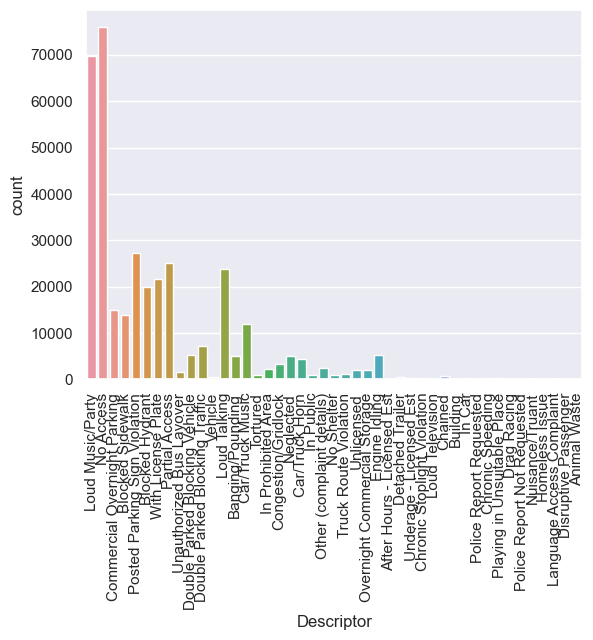

4:
Descriptor    6501
dtype: int64
Pct of Total Cols	2.86%


In [11]:
# 4:  Description Column - EDA for best outcomes
sns.countplot(x='Descriptor', data=df, orient='v')
plt.xticks(rotation=90)
plt.show()

#seems as though replacing with 'None' is fine here as well
descriptor_replacement_col = df_na_count[['Descriptor']]
print(f'4:\n{descriptor_replacement_col}\nPct of Total Cols\t{round(descriptor_replacement_col.shape[0]/total_cols*100.0,2)}%')
df_na_count.drop('Descriptor', inplace=True)
df.fillna(value={'Descriptor': 'None'}, inplace=True)

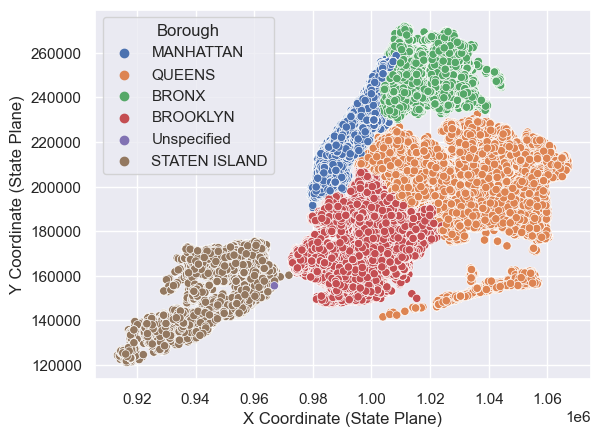

Latitude                      4030
Longitude                     4030
Y Coordinate (State Plane)    4030
Location                      4030
X Coordinate (State Plane)    4030
dtype: int64


In [12]:
# 5:  Location Columns - EDA for best outcomes
location_na_cols = df_na_count[df_na_count == 4030]
sns.scatterplot(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', hue='Borough', data=df)
# plt.xticks(rotation=90)
plt.show()
print(location_na_cols)

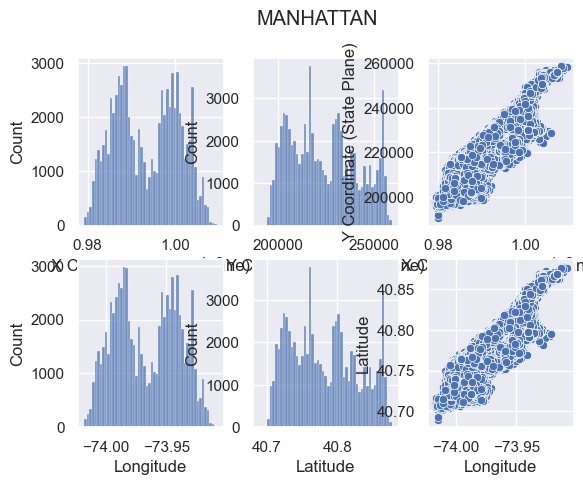

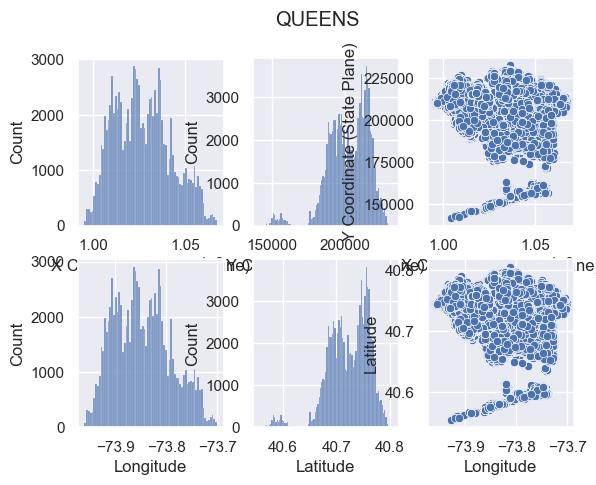

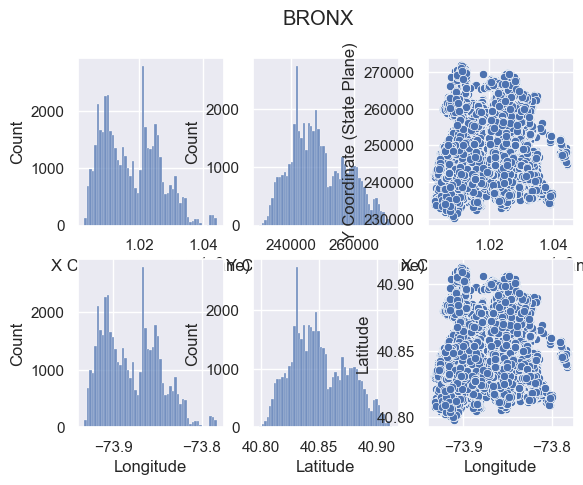

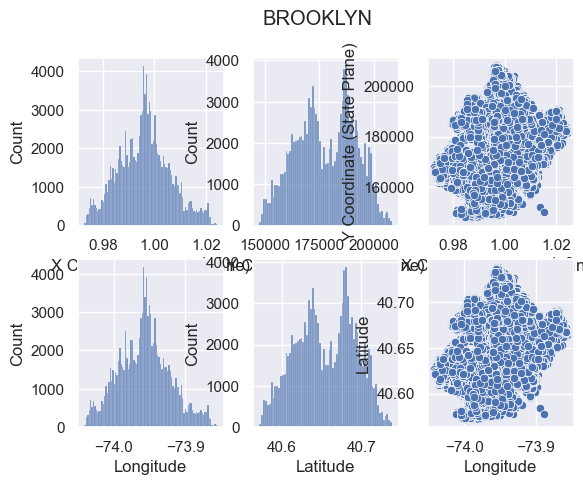

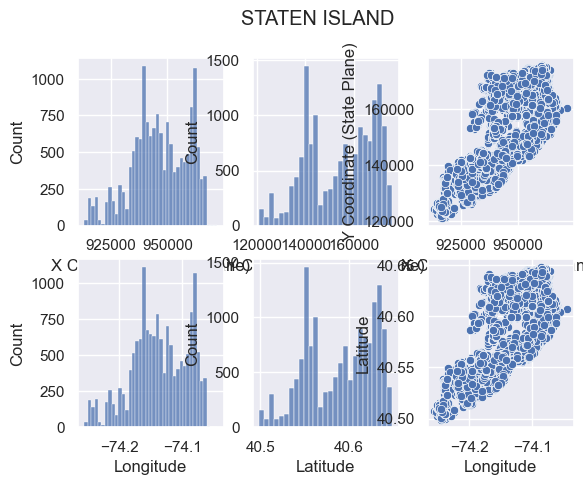

In [13]:
# Unspecified --> STATEN ISLAND for the borough column
df['Borough'].replace('Unspecified', 'STATEN ISLAND', inplace=True)
# Plot each borough's distribution of X, Y Coordinates

for b in df['Borough'].unique():
    fig, axs = plt.subplots(2,3)
    fig.suptitle(b)
    sns.histplot(x='X Coordinate (State Plane)', data=df.loc[df['Borough'] == b], ax=axs[0,0])
    sns.histplot(x='Y Coordinate (State Plane)', data=df.loc[df['Borough'] == b], ax=axs[0,1])
    sns.scatterplot(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', data=df.loc[df['Borough'] == b], ax=axs[0,2])
    sns.histplot(x='Longitude', data=df.loc[df['Borough'] == b], ax=axs[1,0])
    sns.histplot(x='Latitude', data=df.loc[df['Borough'] == b], ax=axs[1,1])
    sns.scatterplot(x='Longitude', y='Latitude', data=df.loc[df['Borough'] == b], ax=axs[1,2])
    plt.show()

In [14]:
# Use Mean imputation to fill in missing X and Y coordinates by borough
impute_cols = location_na_cols.index.tolist()
impute_cols.remove('Location')
impute_cols.append('Unique Key')

from sklearn.impute import SimpleImputer

boroughs = df['Borough'].unique().tolist()
for b in boroughs:
    print(f"Remaining: {df['Latitude'].isnull().sum()}")
    df_borough_pre = df.loc[df['Borough'] == b]
    mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
    df_borough_imp = mean_imputer.fit_transform(df_borough_pre[impute_cols])
    df_borough_post = pd.DataFrame(df_borough_imp, columns=['Latitude', 'Longitude', 'Y Coordinate (State Plane)', 'X Coordinate (State Plane)', 'Unique Key', 'IndLatitude', 'IndLongitude', 'IndY Coordinate (State Plane)', 'IndX Coordinate (State Plane)'])
    df_borough_post['Borough'] = b
    df_borough_post['Imp'] = df_borough_post[['IndLatitude', 'IndLongitude', 'IndY Coordinate (State Plane)', 'IndX Coordinate (State Plane)']].sum(axis=1) >= 1
    
    df_borough_post.drop(columns=['IndLatitude', 'IndLongitude', 'IndY Coordinate (State Plane)', 'IndX Coordinate (State Plane)', 'Borough'], inplace=True)
    df = pd.merge(df, df_borough_post, how='left', on=['Unique Key'], suffixes=('', f'_{b}'))
    
    if boroughs.index(b) == 0:
        repl_cols = ['Latitude','Longitude','Y Coordinate (State Plane)','X Coordinate (State Plane)']
    else:
        repl_cols = ['Latitude','Longitude','Y Coordinate (State Plane)','X Coordinate (State Plane)', 'Imp']
    oth_cols = [c + f'_{b}' for c in repl_cols]
    
    for r in range(len(repl_cols)):
        df[repl_cols[r]] = df.apply(lambda row: row[oth_cols[r]] if not np.isnan(row[oth_cols[r]]) else row[repl_cols[r]], axis=1)
    df.drop(columns=oth_cols, inplace=True)
    
assert df['Latitude'].isnull().sum() == 0
    
df['Location'] = f"({df['Latitude']}, {df['Longitude']})"

Remaining: 4030
Remaining: 3375
Remaining: 3301
Remaining: 3183
Remaining: 2966


In [15]:
df_na_count = df.isna().sum()
print(df_na_count)

Unique Key                               0
Created Date                             0
Closed Date                              0
Agency                                   0
Agency Name                              0
Complaint Type                           0
Descriptor                               0
Location Type                          133
Incident Zip                          2998
Incident Address                         0
Street Name                              0
Cross Street 1                           0
Cross Street 2                           0
Intersection Street 1                    0
Intersection Street 2                    0
Address Type                          3252
City                                  2997
Landmark                                 0
Facility Type                         2389
Status                                   0
Due Date                                 0
Resolution Description                   0
Resolution Action Updated Date           0
Community B

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


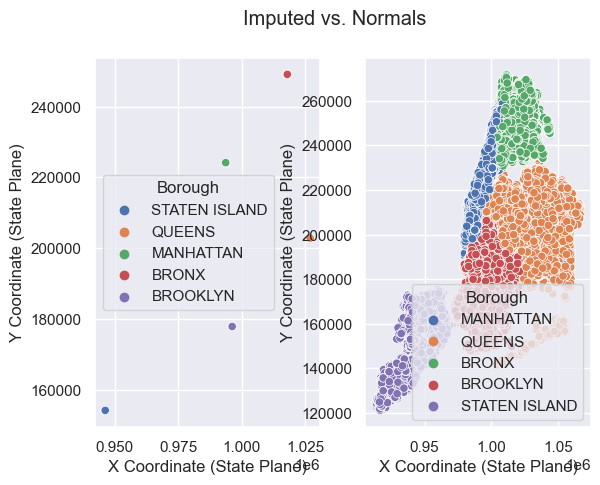

In [16]:
# Check where the imputations put the locations by borough  
fig, axs = plt.subplots(1,2)
fig.suptitle('Imputed vs. Normals')
sns.scatterplot(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', hue='Borough', data=df.loc[df.Imp==True], ax=axs[0])
sns.scatterplot(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', hue='Borough', data=df.loc[df.Imp==False], ax=axs[1])
plt.show()

In [17]:
# drop Imp column, reset NA count
df.drop(columns=['Imp'], inplace=True)
df_na_count = df.isna().sum()
df_na_count = df_na_count[df_na_count > 0].sort_values(ascending=False)
na_cols = list(df_na_count.index)
print(df_na_count)

Address Type     3252
Incident Zip     2998
City             2997
Facility Type    2389
Location Type     133
School Region       1
School Code         1
School Zip          1
dtype: int64


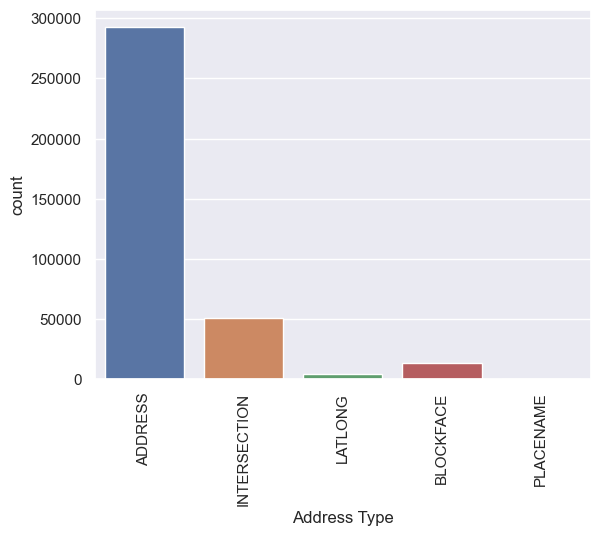

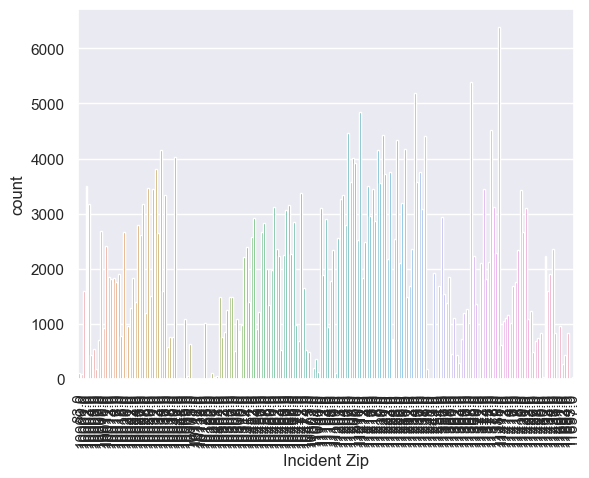

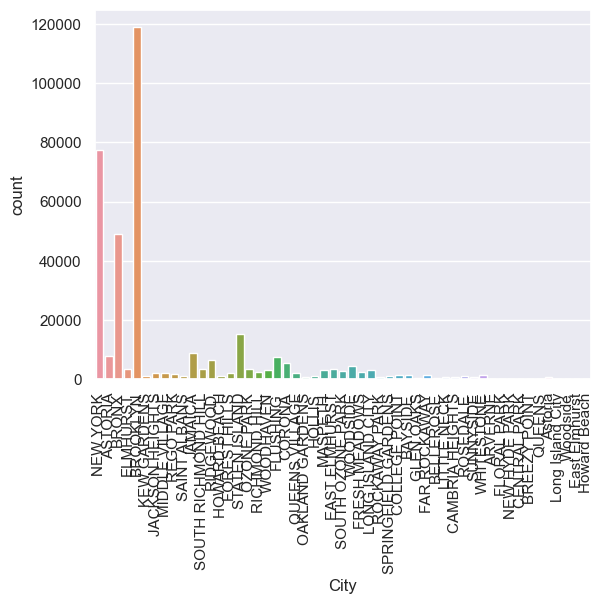

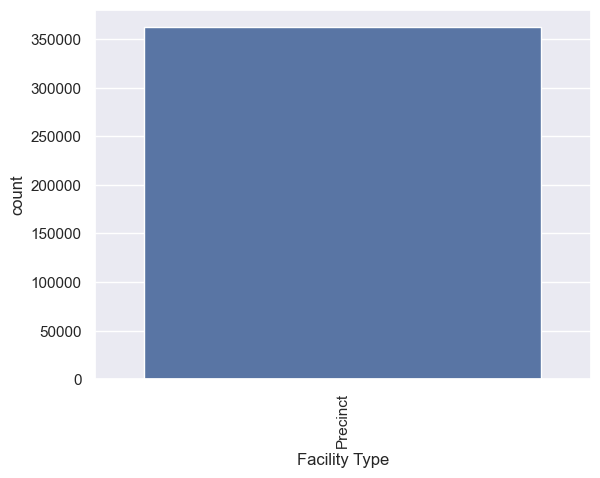

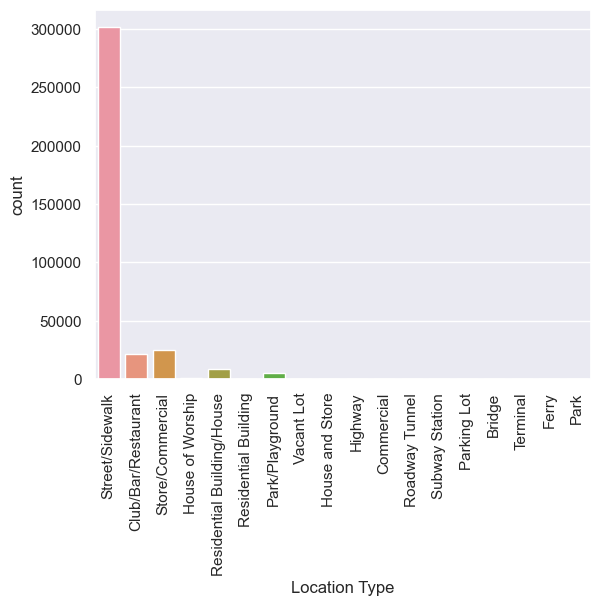

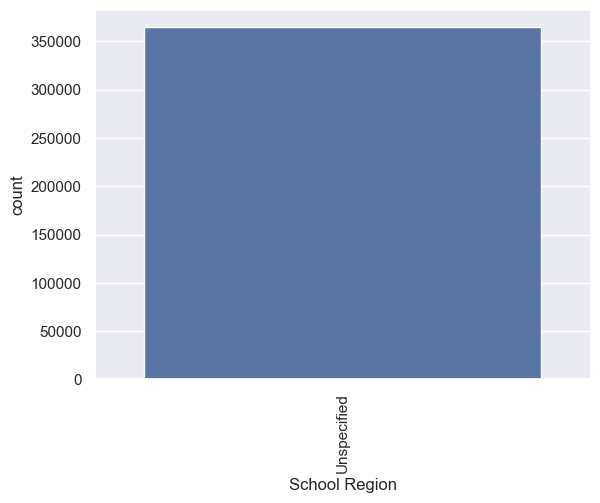

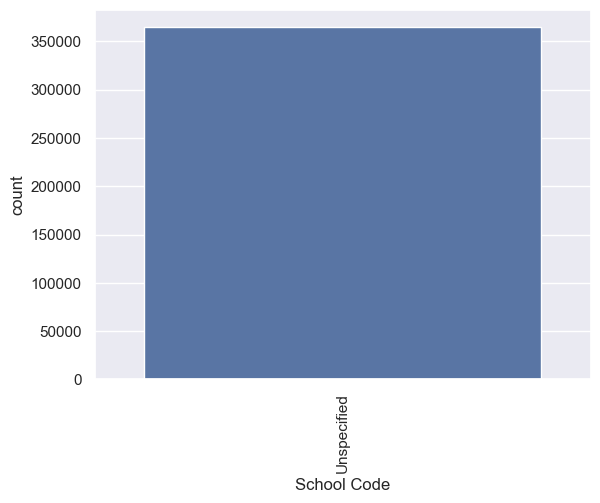

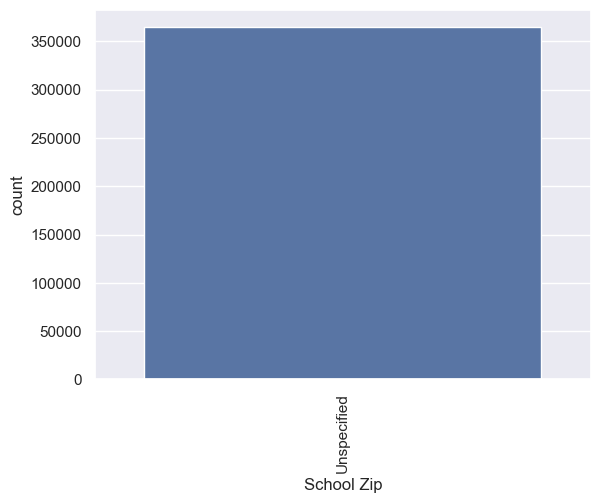

In [18]:
# Check the remaining columns
for n in na_cols:
    sns.countplot(x=n, data=df, orient='v')
    plt.xticks(rotation=90)
    plt.show()



In [19]:
# Address Type --> Unspecified
# Facility Type --> Precinct
# Location Type --> Safe to assume Street/Sidewalk
# School Columns --> Unspecified
replacement_dict = {
    'Address Type': 'Unspecified',
    'Facility Type': 'Precinct',
    'Location Type': 'Street/Sidewalk',
    'School Region': 'Unspecified',
    'School Code': 'Unspecified',
    'School Zip': 'Unspecified'
}
df.fillna(value=replacement_dict, inplace=True)

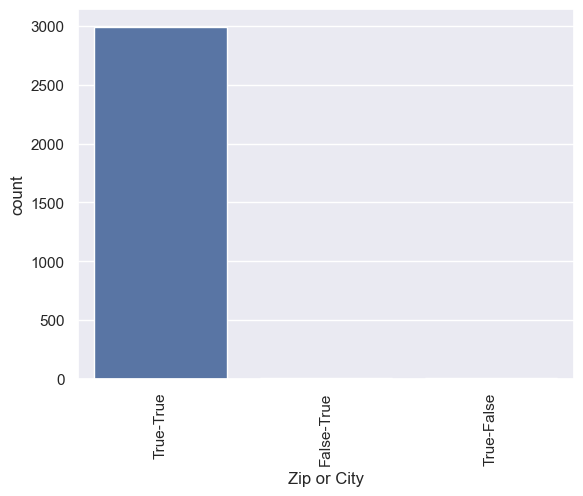

True-True     2994
True-False       4
False-True       3
Name: Zip or City, dtype: int64


In [20]:
# Define what overlap we may. have between the nulls in both columns
df['Zip or City'] = df['Incident Zip'].isna().astype(str) + '-' + df['City'].isna().astype(str)
bool_series = df.loc[df['Zip or City'] != 'False-False']['Zip or City']
sns.countplot(x=bool_series, data=bool_series, orient='v')
plt.xticks(rotation=90)
plt.show()
print(bool_series.value_counts())

In [21]:
# reset N column variables
df_na_count = df.isna().sum()
df_na_count = df_na_count[df_na_count > 0].sort_values(ascending=False)
na_cols = list(df_na_count.index)

# Use Mode Imputation by borough (similar to Lat/Long imputation) to get Zip & City
# May mess up 7 instances --> likely not important
na_cols.append('Unique Key')

# boroughs = df['Borough'].unique().tolist()
for b in boroughs:
    print(f"Remaining: {df.loc[df['Zip or City'] != 'False-False']['Zip or City'].count()}\nRunning {b}\n\n")
    df_borough_pre = df.loc[df['Borough'] == b]
    mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df_borough_imp = mode_imputer.fit_transform(df_borough_pre[na_cols])
    df_borough_post = pd.DataFrame(df_borough_imp, columns=['Incident Zip', 'City', 'Unique Key'])

    df = pd.merge(df, df_borough_post, how='left', on=['Unique Key'], suffixes=('', f'_{b}'))
    repl_cols = ['Incident Zip', 'City']
    oth_cols = [c + f'_{b}' for c in repl_cols]

    for r in range(len(repl_cols)):
        df[repl_cols[r]] = df.apply(lambda row: row[oth_cols[r]] if not pd.isna(row[oth_cols[r]]) else row[repl_cols[r]], axis=1)
    df.drop(columns=oth_cols, inplace=True)
    df['Zip or City'] = df['Incident Zip'].isna().astype(str) + '-' + df['City'].isna().astype(str)

assert df['Incident Zip'].isnull().sum() == 0
assert df['City'].isnull().sum() == 0

df.drop(columns=['Zip or City'], inplace=True)

Remaining: 3001
Running MANHATTAN


Remaining: 2962
Running QUEENS


Remaining: 2960
Running BRONX


Remaining: 2959
Running BROOKLYN


Remaining: 2959
Running STATEN ISLAND




In [22]:
# Final Null Check
df_na_count = df.isna().sum()
df_na_count = df_na_count[df_na_count > 0].sort_values(ascending=False)
print(df_na_count)

Series([], dtype: int64)


### B - Analyze date columns and remove the entries if it has an incorrect timeline

In [23]:
# refresher on dataframe data types
print(df.dtypes)

Unique Key                                    object
Created Date                          datetime64[ns]
Closed Date                           datetime64[ns]
Agency                                        object
Agency Name                                   object
Complaint Type                                object
Descriptor                                    object
Location Type                                 object
Incident Zip                                 float64
Incident Address                              object
Street Name                                   object
Cross Street 1                                object
Cross Street 2                                object
Intersection Street 1                         object
Intersection Street 2                         object
Address Type                                  object
City                                          object
Landmark                                      object
Facility Type                                 

In [24]:
# Correct timeline --> Created Date <= Closed Date <= MAX(Due Date, Resolution Action Updated Date)
df['Correct Timeline'] = df.apply(lambda x: True if x['Created Date'] <= x['Closed Date'] and x['Closed Date'] <= x[['Due Date', 'Resolution Action Updated Date']].max() else False, axis=1)

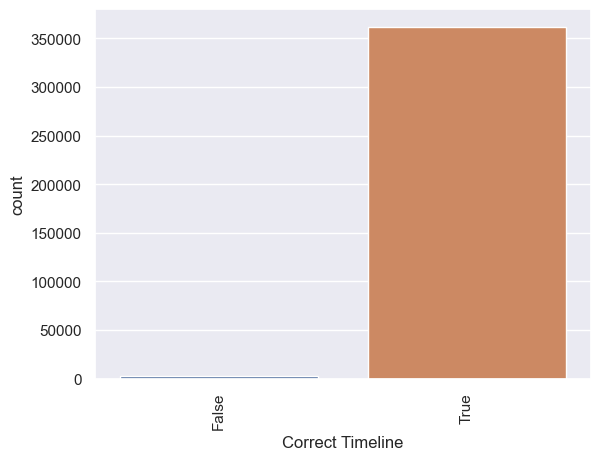

(364558, 52)


In [25]:
# Check True/False counts
sns.countplot(x='Correct Timeline', data=df, orient='v')
plt.xticks(rotation=90)
plt.show()
print(df.shape)

In [26]:
# Remove Rows where Correct Timeline is False and drop the column
df = df.loc[df['Correct Timeline'] == True]

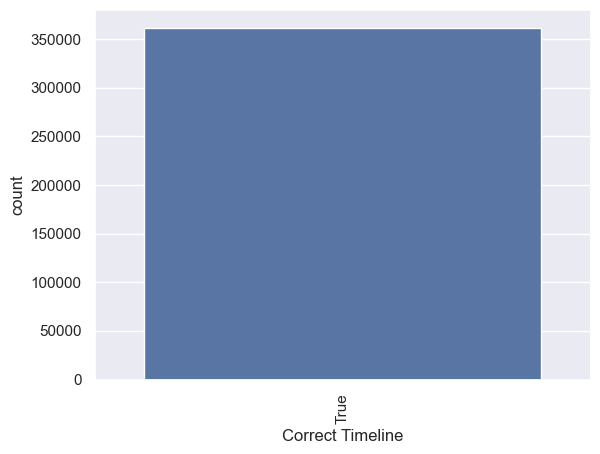

(361914, 52)


In [27]:
# Check True/False counts
sns.countplot(x='Correct Timeline', data=df, orient='v')
plt.xticks(rotation=90)
plt.show()
print(df.shape)

In [28]:
df = df.drop(columns=['Correct Timeline'])
print(df.shape)

(361914, 51)


### C - Draw a frequency plot for city-wise complaints

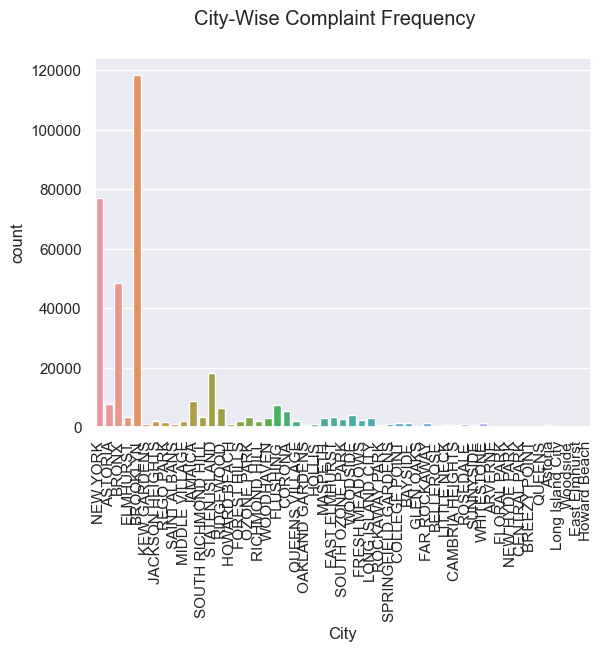

In [29]:
sns.countplot(x='City', data=df)
plt.xticks(rotation=90)
plt.suptitle('City-Wise Complaint Frequency')
plt.show()

### D - Draw scatter and hexbin plots for complaint concentration across Brooklyn

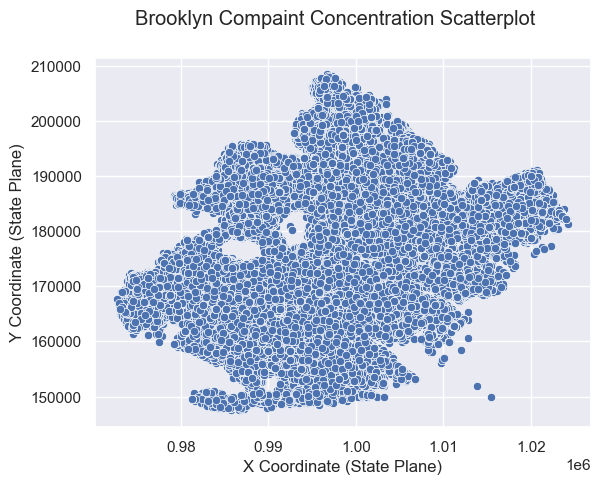

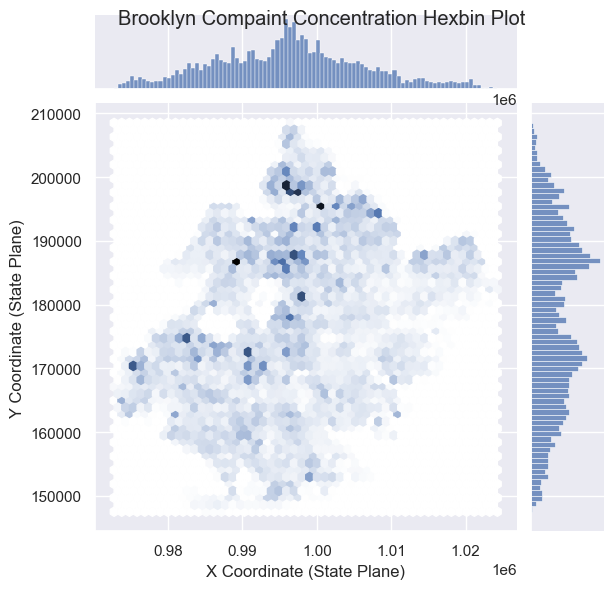

In [30]:
bk_df = df.loc[df['Borough'] == 'BROOKLYN']

# Scatter
sns.scatterplot(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', data=bk_df)
plt.suptitle('Brooklyn Compaint Concentration Scatterplot')
plt.show()

# Hexbin
sns.jointplot(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', kind='hex', data=bk_df)
plt.suptitle('Brooklyn Compaint Concentration Hexbin Plot')
plt.show()

## 3 - Find Major Types of Complaints

### A - Plot Bar Graph of Count vs. Complaint Types

In [31]:
complaint_df = pd.DataFrame(df[['Complaint Type']].value_counts()).reset_index()
complaint_df.columns = ['Complaint Type','Count']
complaint_df.sort_values('Count', inplace=True, ascending=False)
complaint_df.reset_index()
print(complaint_df)

               Complaint Type   Count
0            Blocked Driveway  100146
1             Illegal Parking   92113
2     Noise - Street/Sidewalk   51544
3          Noise - Commercial   43970
4            Derelict Vehicle   20847
5             Noise - Vehicle   19302
6                Animal Abuse   10468
7                     Traffic    5166
8         Homeless Encampment    4845
9                     Vending    4172
10               Noise - Park    4094
11                   Drinking    1406
12   Noise - House of Worship    1066
13      Posting Advertisement     681
14        Urinating in Public     639
15  Bike/Roller/Skate Chronic     475
16                Panhandling     324
17           Disorderly Youth     315
18          Illegal Fireworks     171
19                   Graffiti     155
20              Agency Issues       8
21                   Squeegee       4
22            Ferry Complaint       2
23           Animal in a Park       1


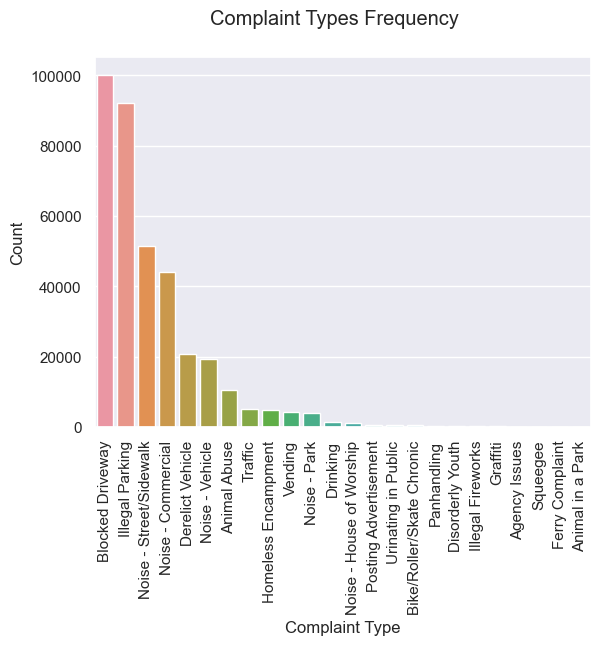

In [32]:
sns.barplot(data=complaint_df, x='Complaint Type', y='Count')
plt.xticks(rotation=90)
plt.suptitle('Complaint Types Frequency')
plt.show()

### B - Find the Top 10 Types of Complaints

In [33]:
print(complaint_df[:10])
top_10_complaints = complaint_df[:10]['Complaint Type'].tolist()
print(top_10_complaints)

            Complaint Type   Count
0         Blocked Driveway  100146
1          Illegal Parking   92113
2  Noise - Street/Sidewalk   51544
3       Noise - Commercial   43970
4         Derelict Vehicle   20847
5          Noise - Vehicle   19302
6             Animal Abuse   10468
7                  Traffic    5166
8      Homeless Encampment    4845
9                  Vending    4172
['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk', 'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle', 'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending']


### C - Display Types of Complaints in each city in a separate dataset

In [34]:
city_complaint_df = pd.DataFrame(df[['Complaint Type','City']].value_counts()).reset_index()
city_complaint_df.columns = ['Complaint Type','City','Count']
city_complaint_df.sort_values('Count', inplace=True, ascending=False)
city_complaint_df.reset_index()
print(city_complaint_df)

              Complaint Type            City  Count
0           Blocked Driveway        BROOKLYN  36241
1            Illegal Parking        BROOKLYN  33351
2    Noise - Street/Sidewalk        NEW YORK  22222
3         Noise - Commercial        NEW YORK  18627
4           Blocked Driveway           BRONX  16745
..                       ...             ...    ...
705                 Drinking     FLORAL PARK      1
704                  Vending      WHITESTONE      1
703                 Drinking    FOREST HILLS      1
702    Posting Advertisement  QUEENS VILLAGE      1
777    Posting Advertisement       RIDGEWOOD      1

[778 rows x 3 columns]


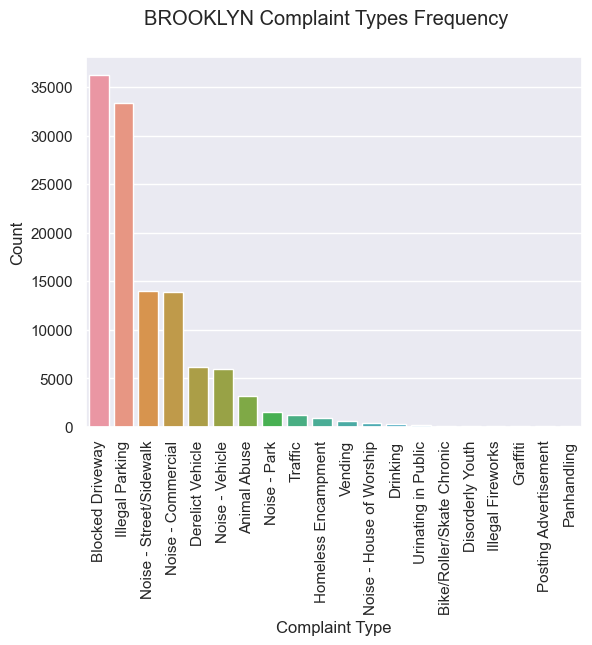

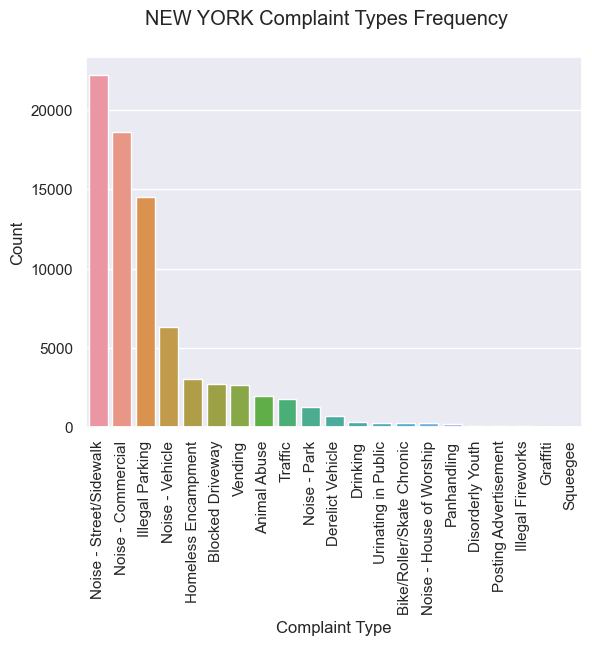

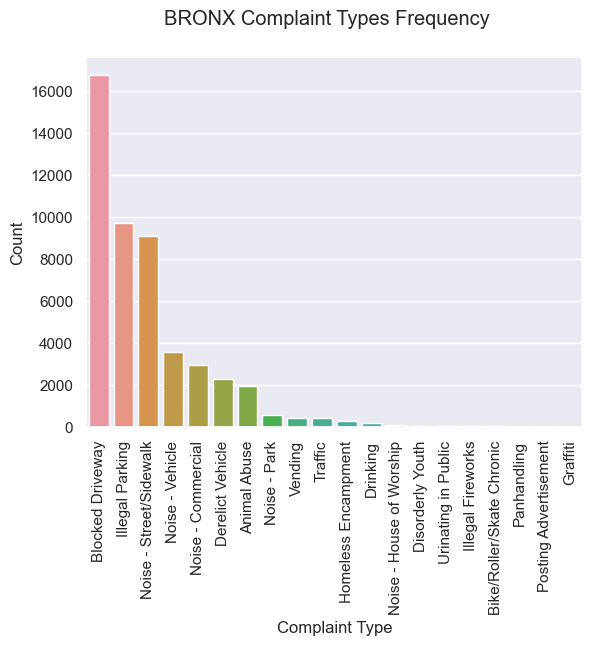

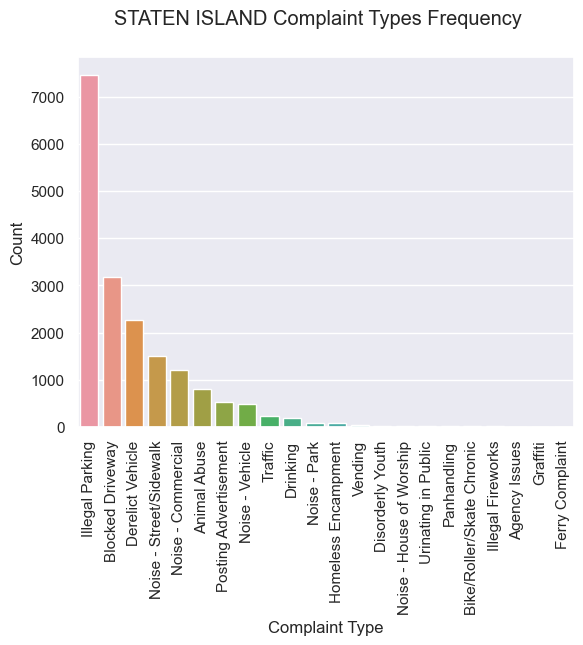

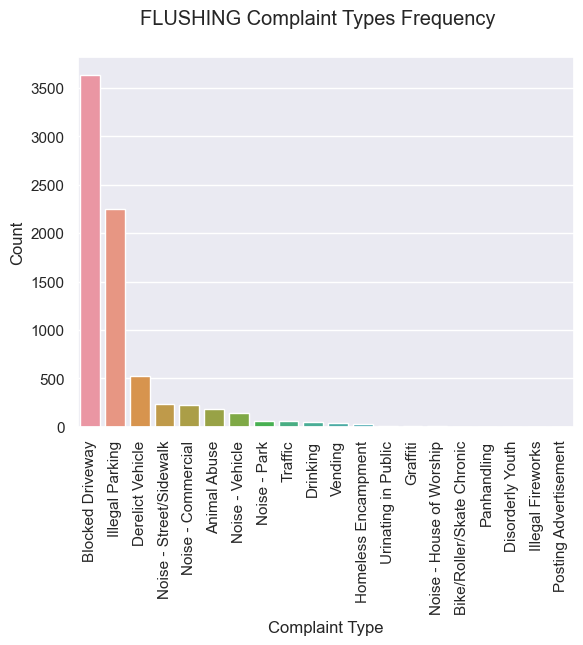

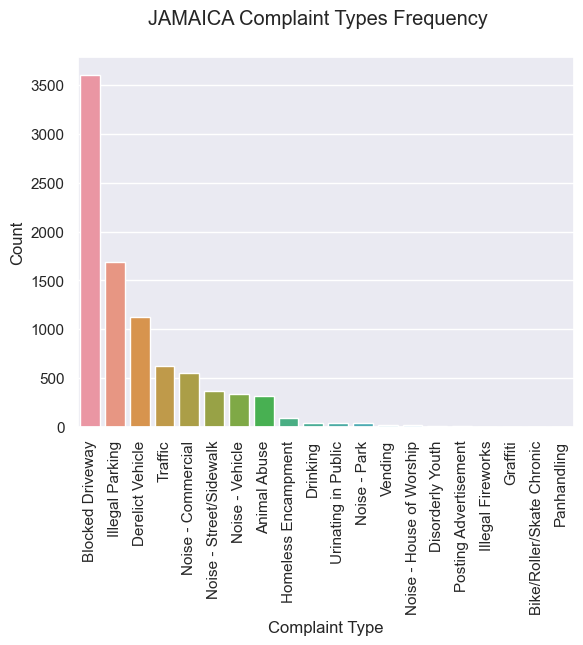

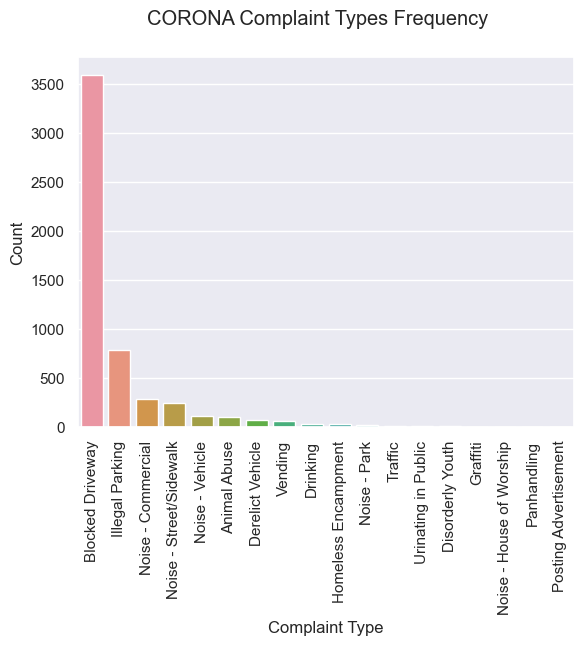

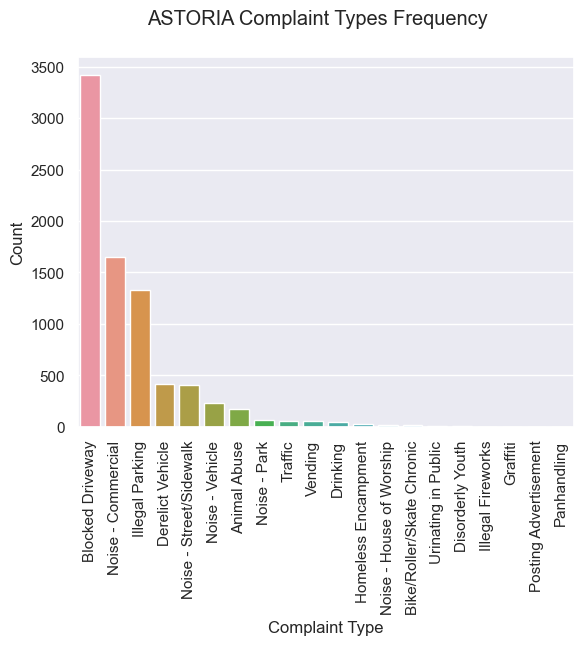

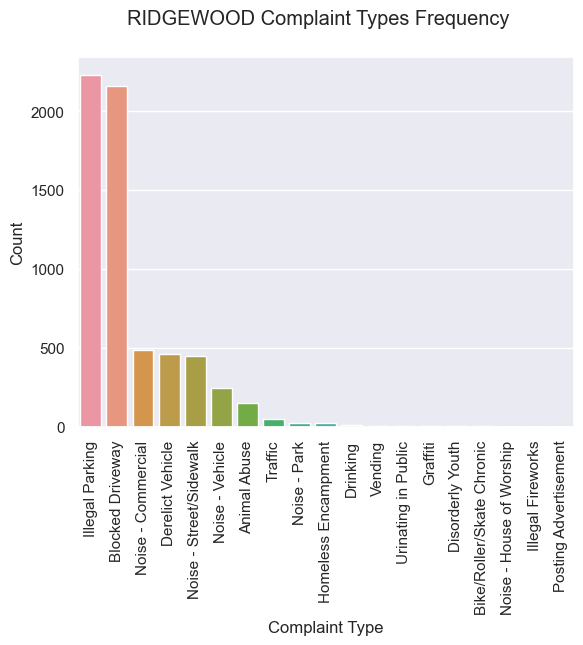

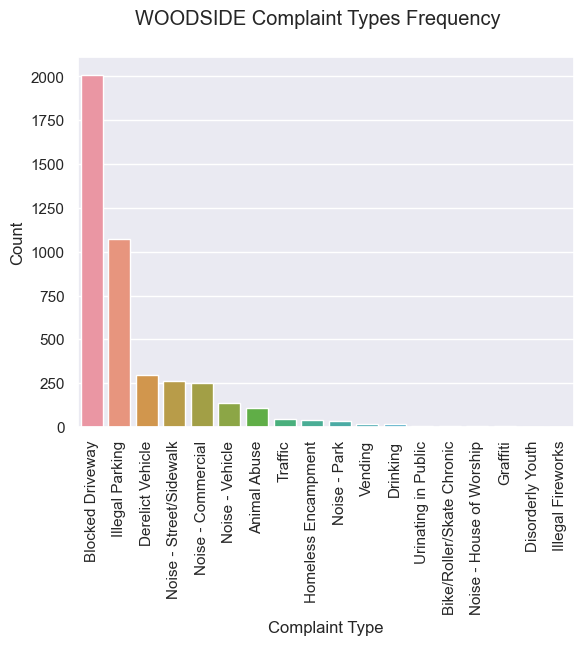

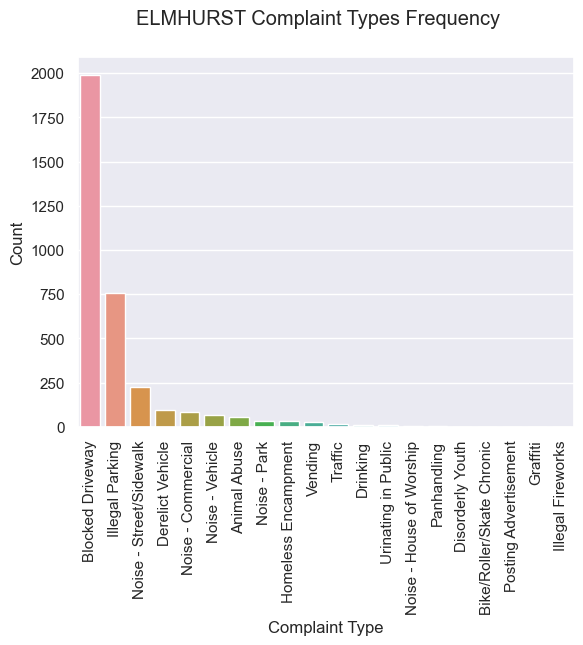

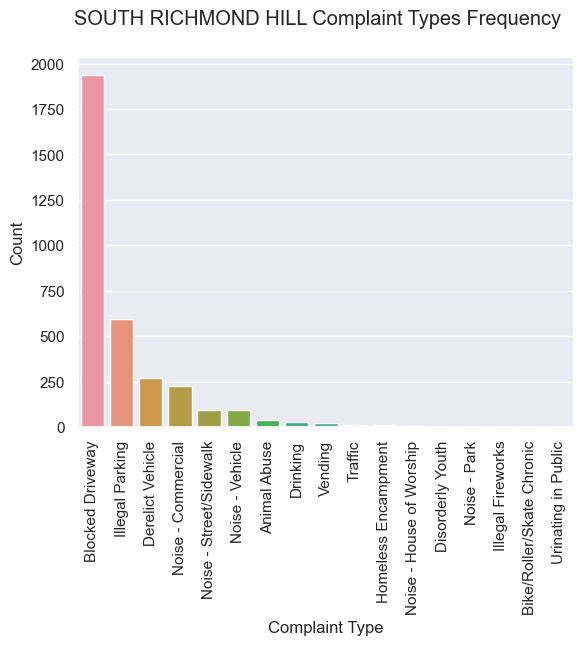

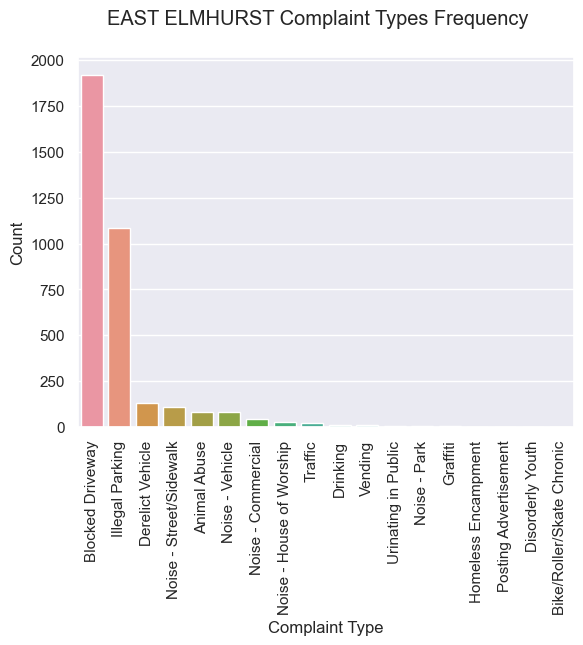

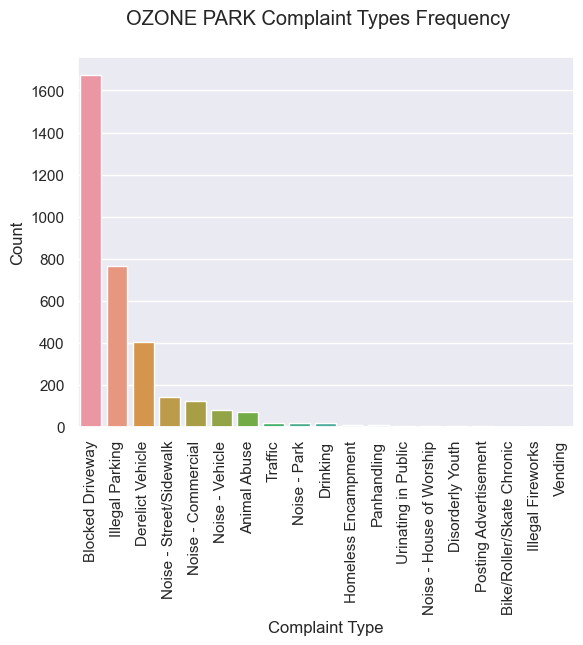

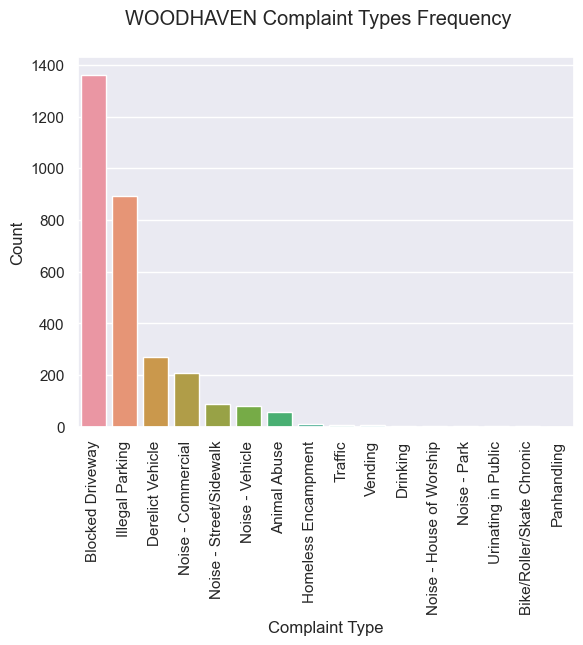

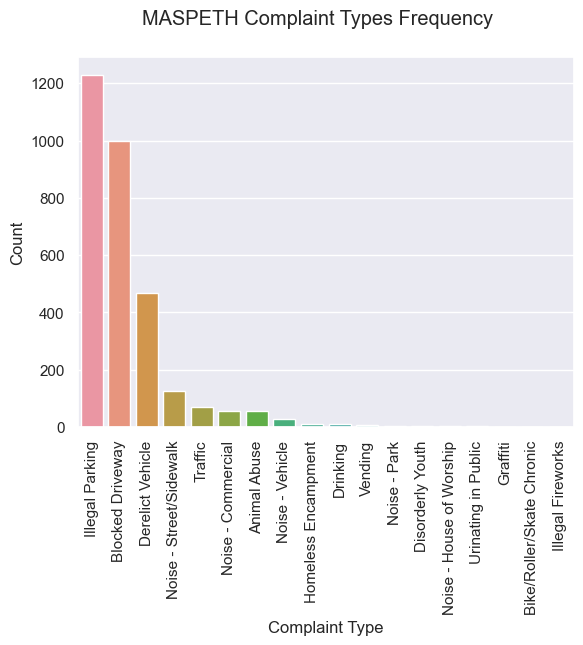

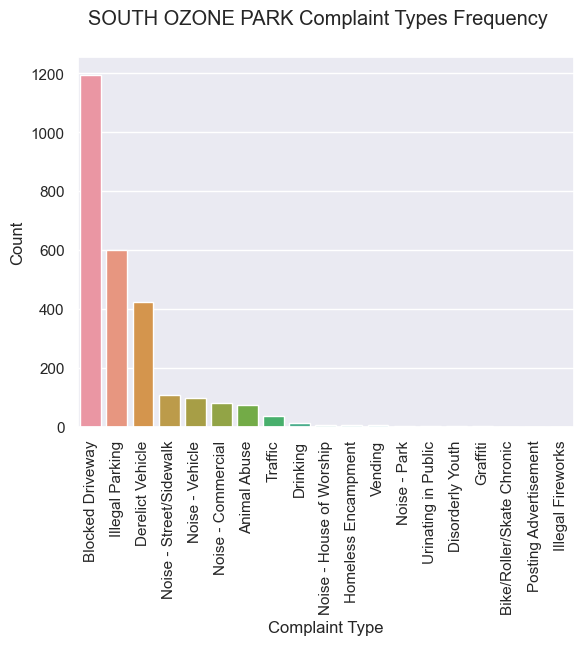

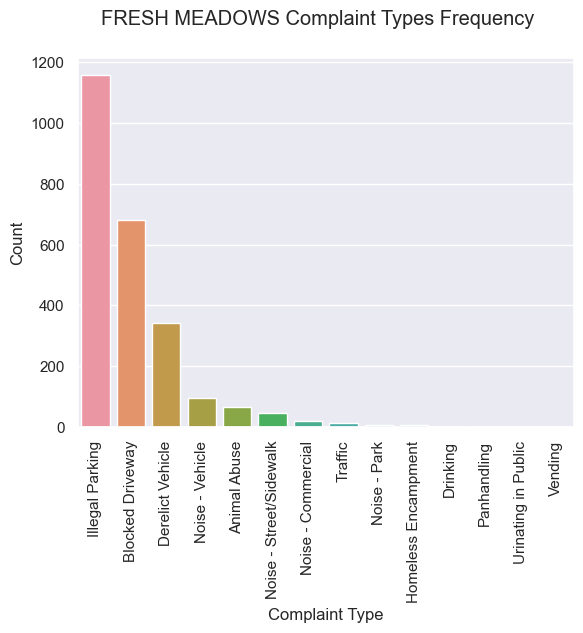

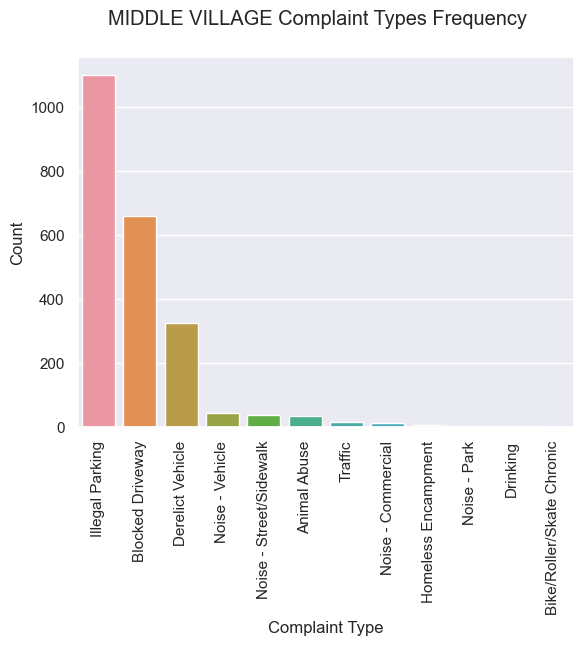

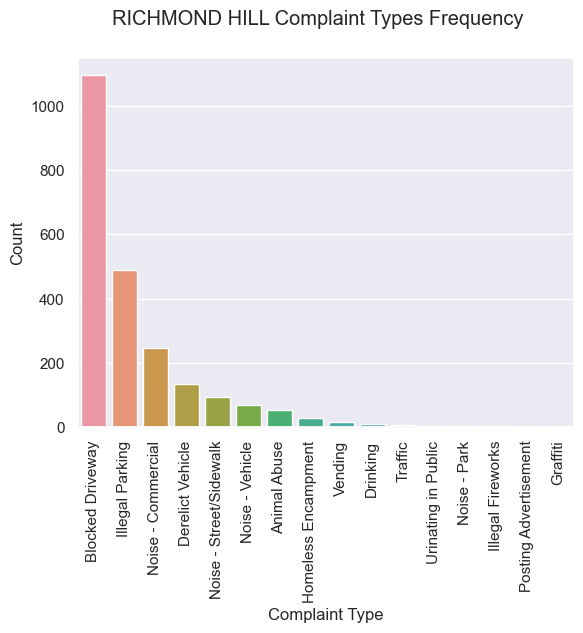

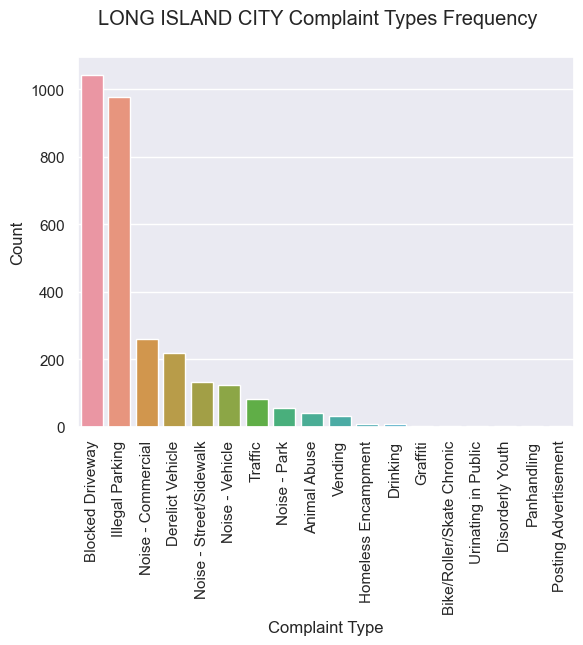

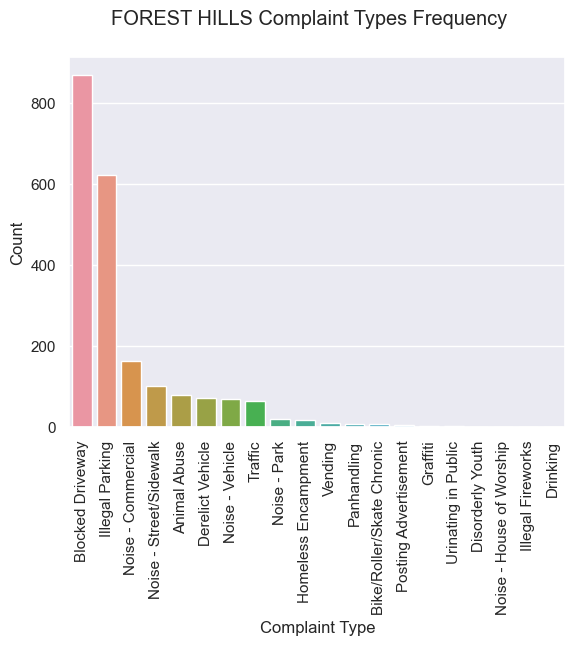

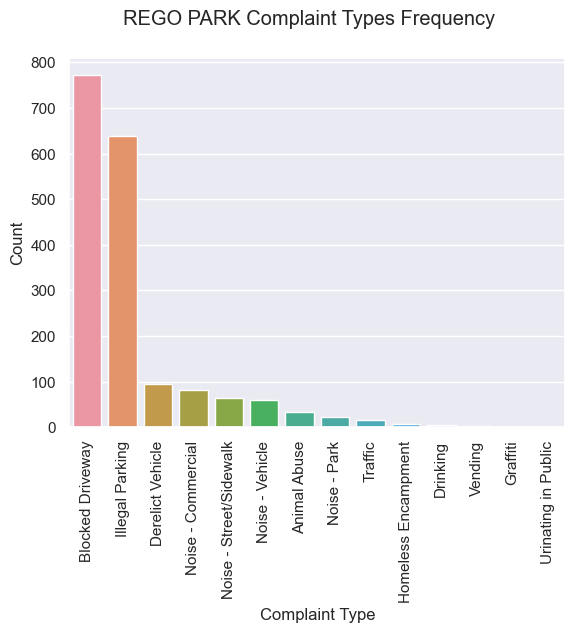

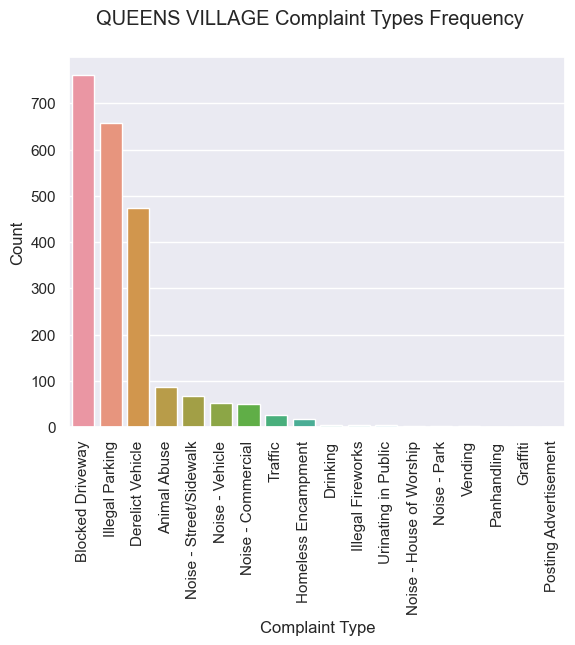

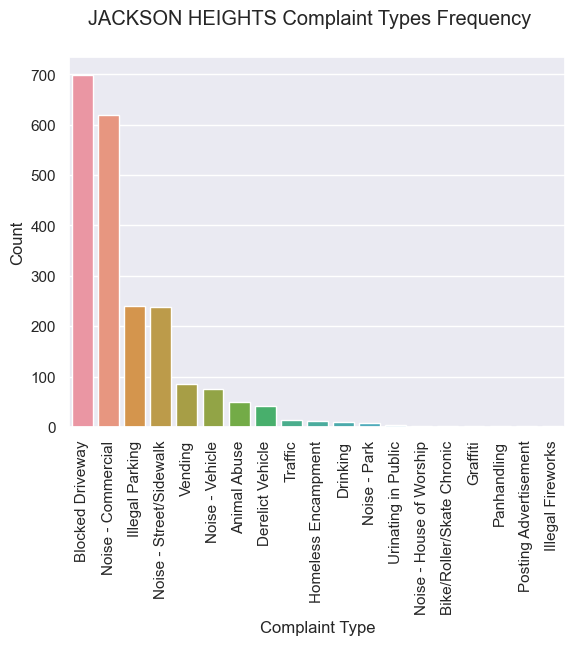

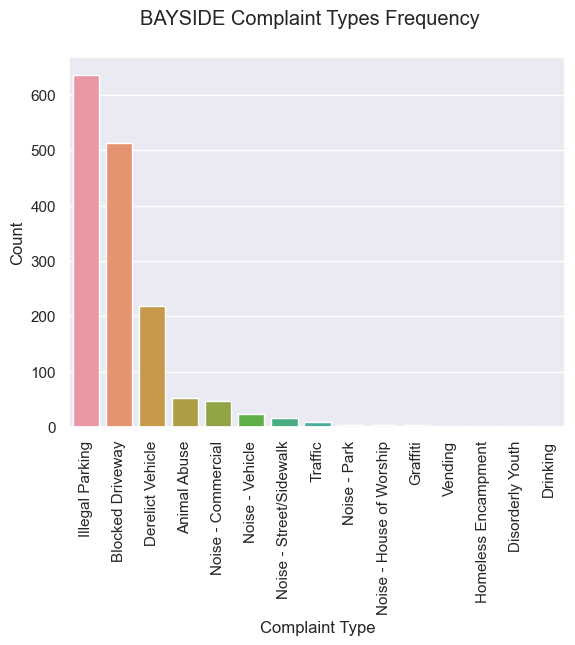

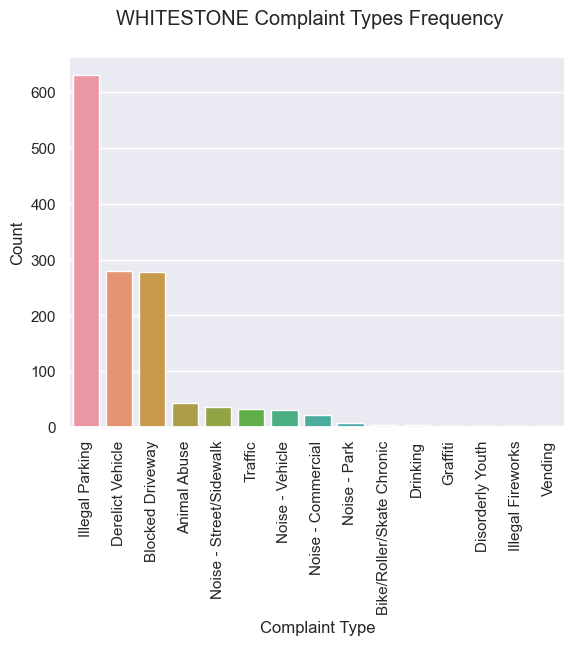

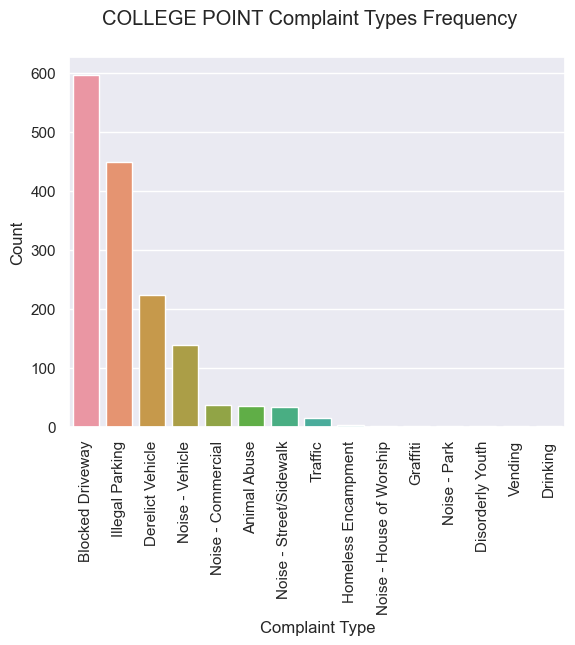

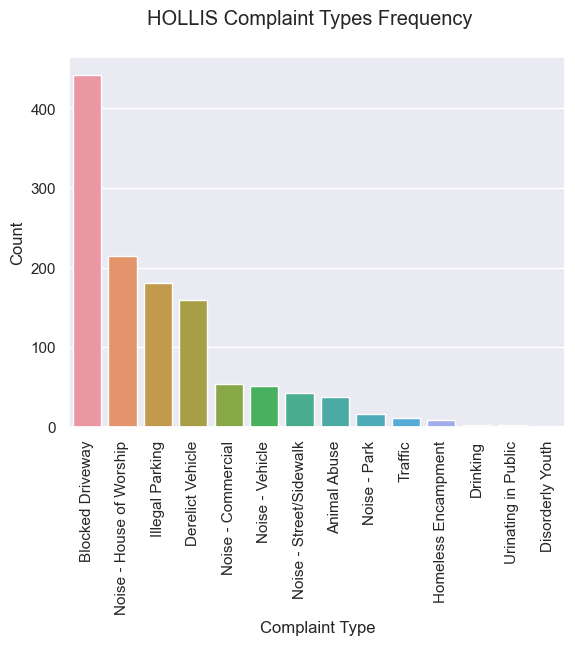

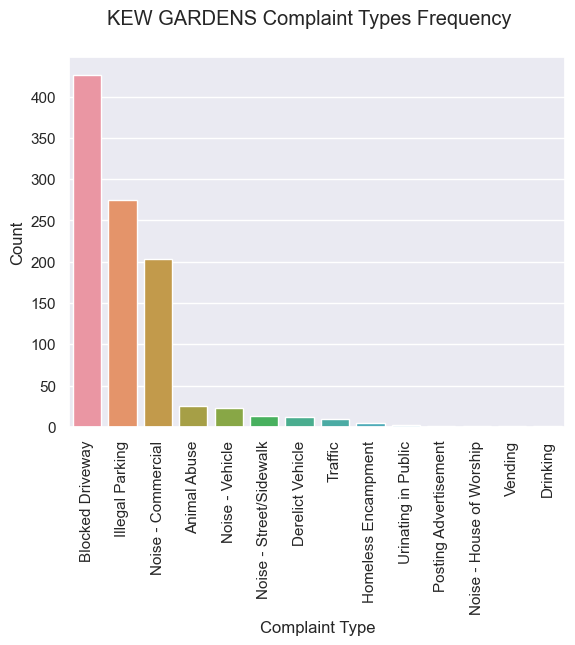

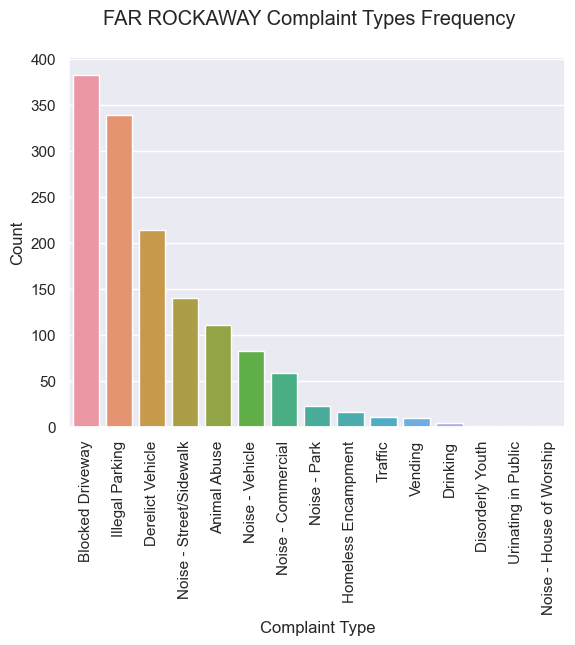

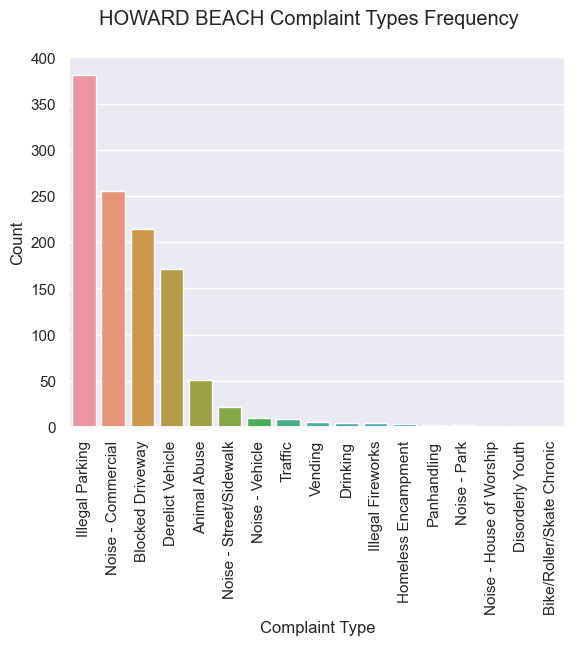

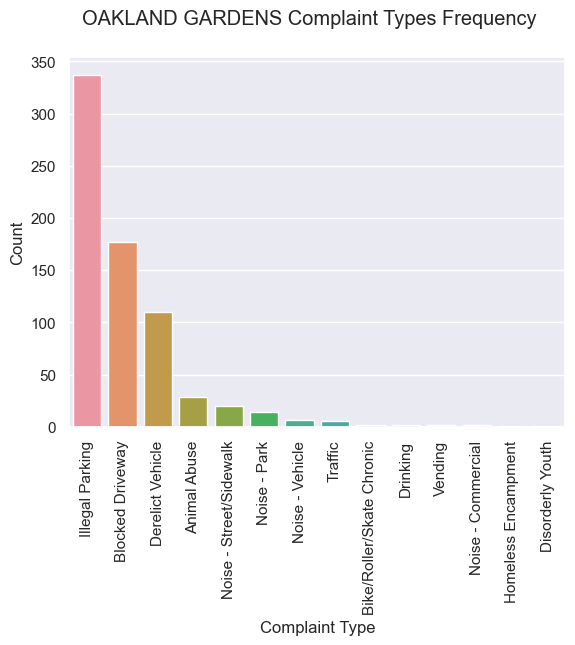

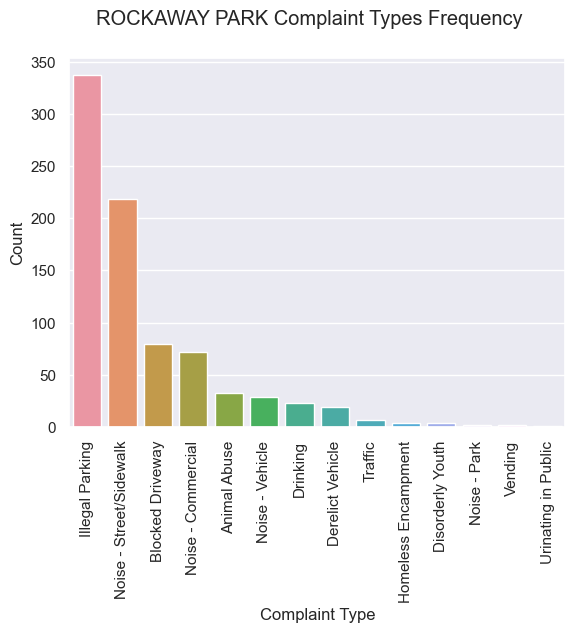

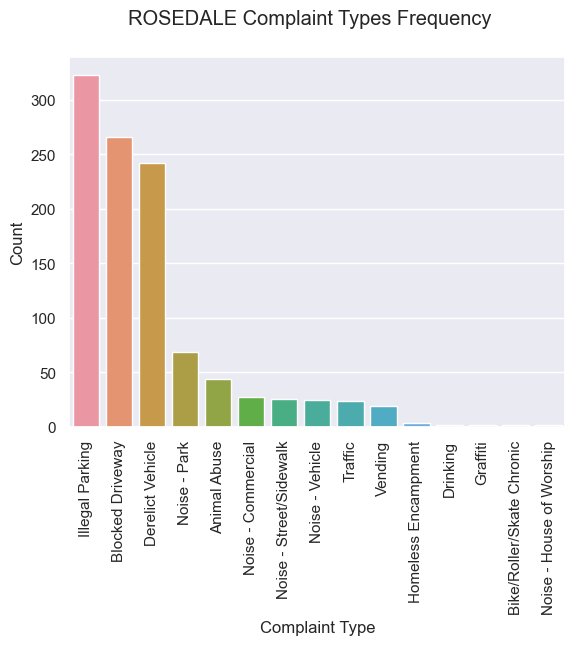

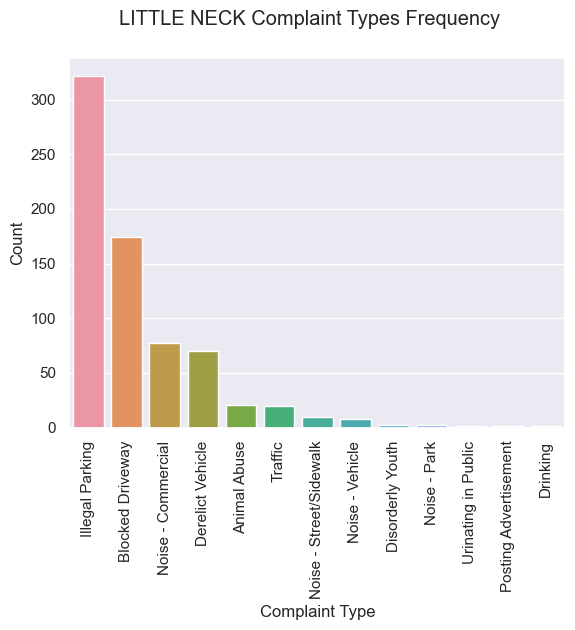

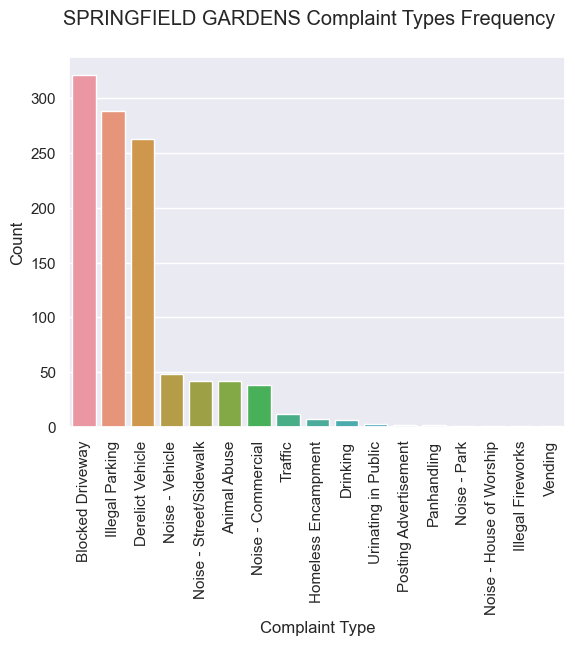

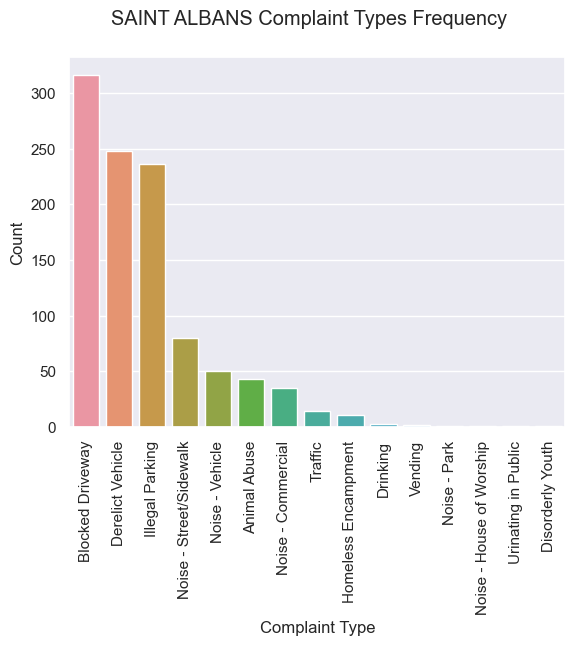

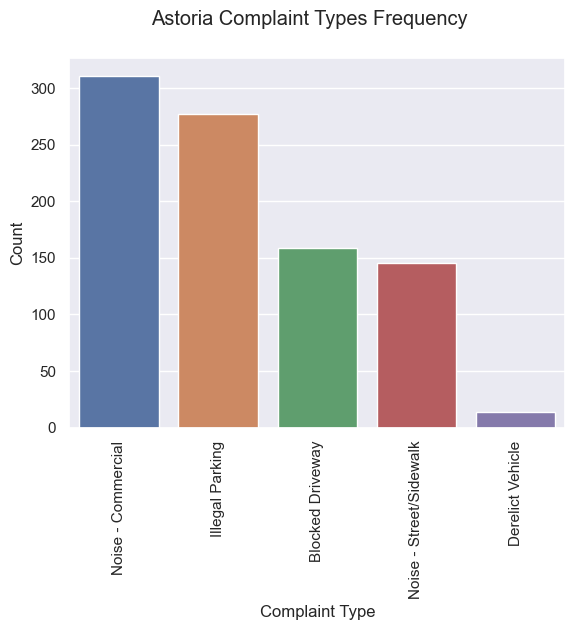

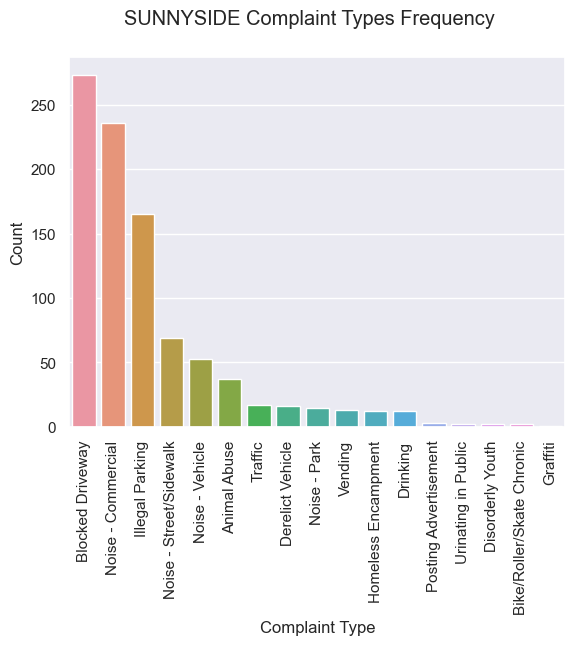

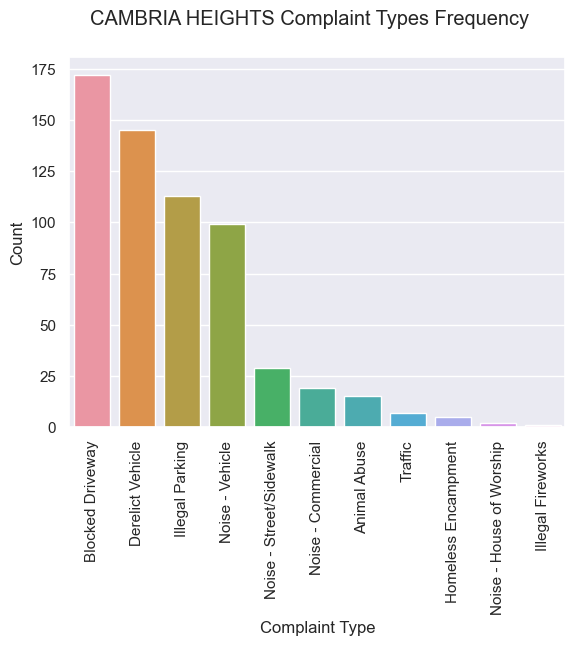

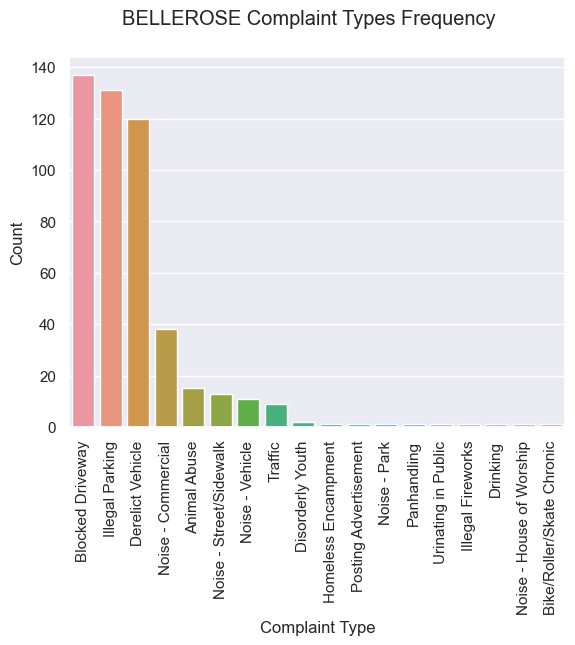

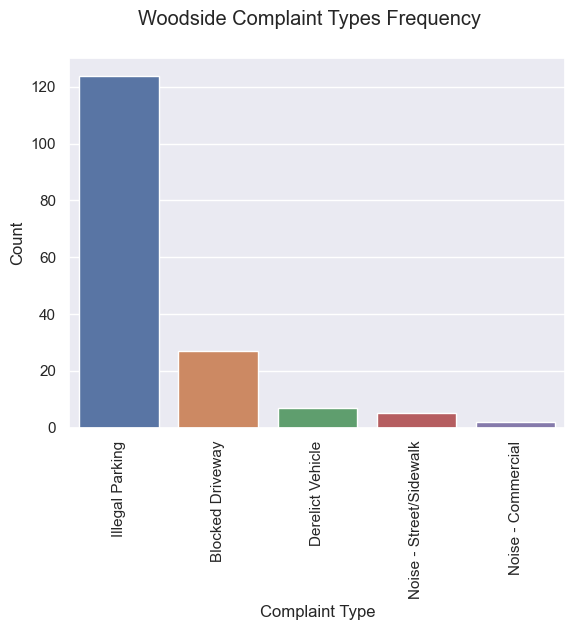

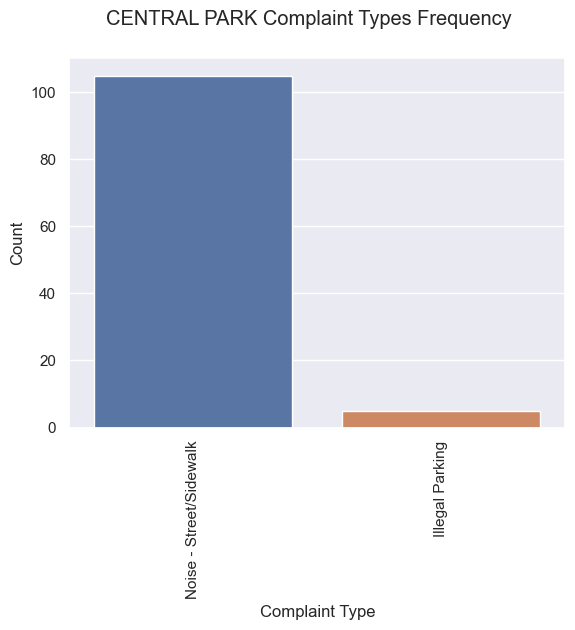

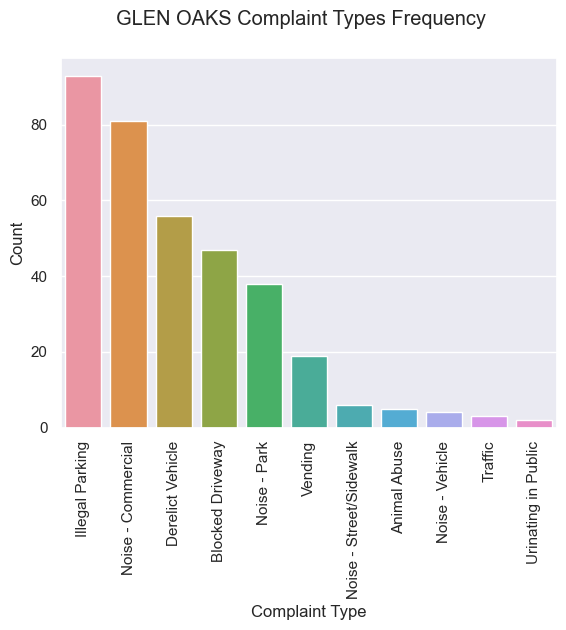

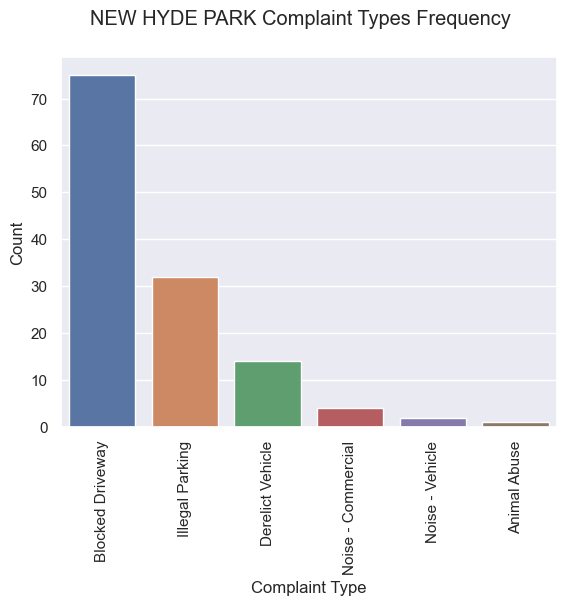

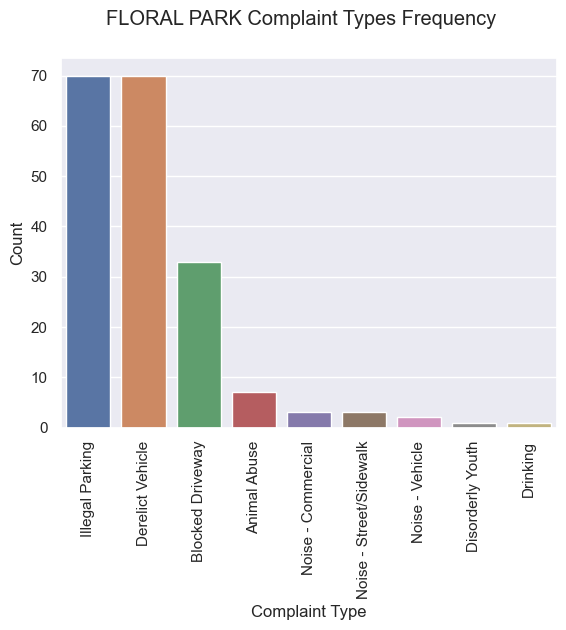

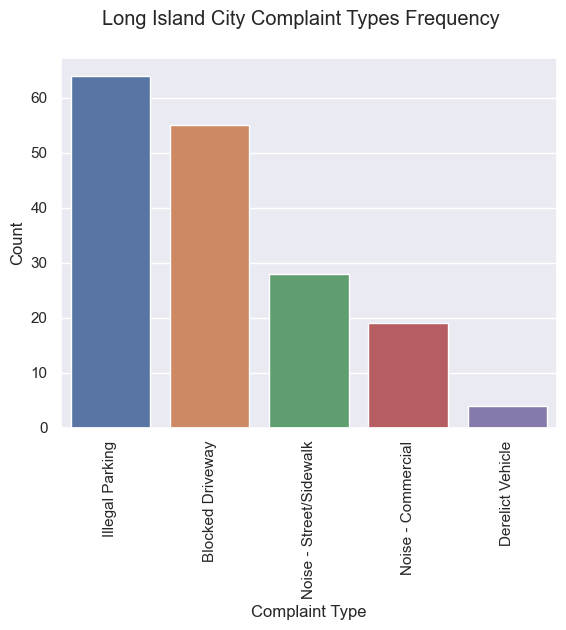

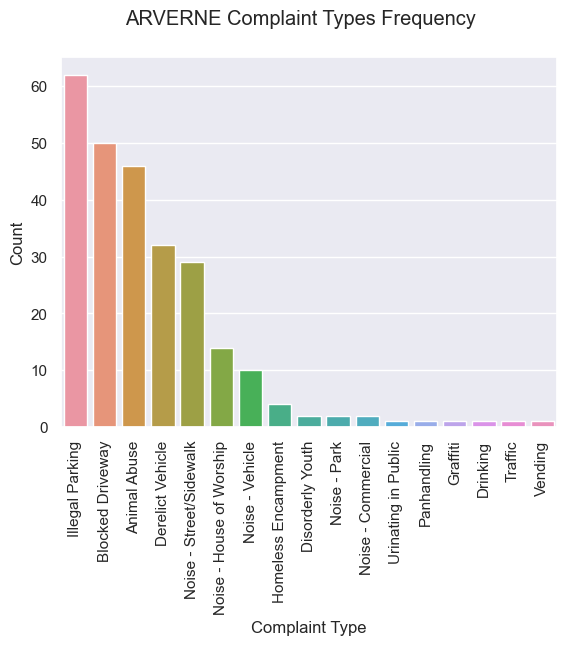

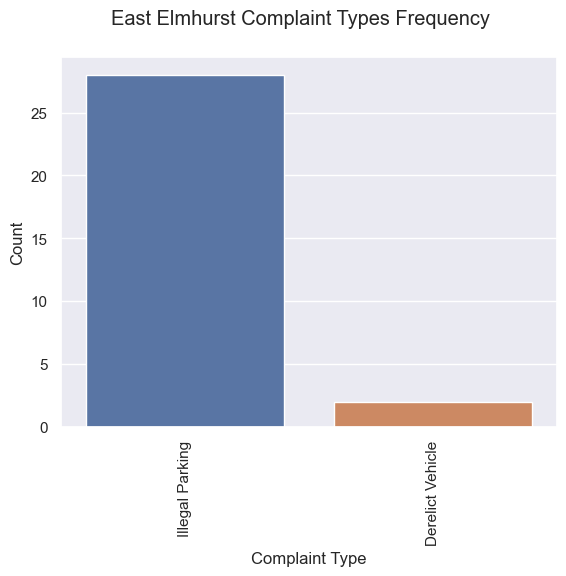

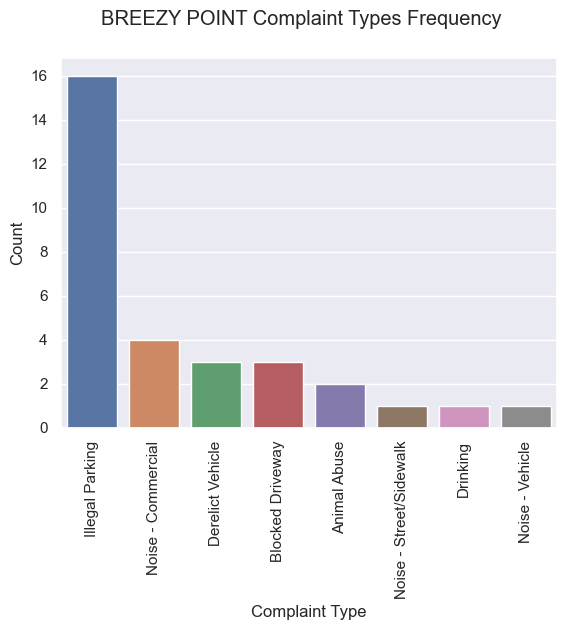

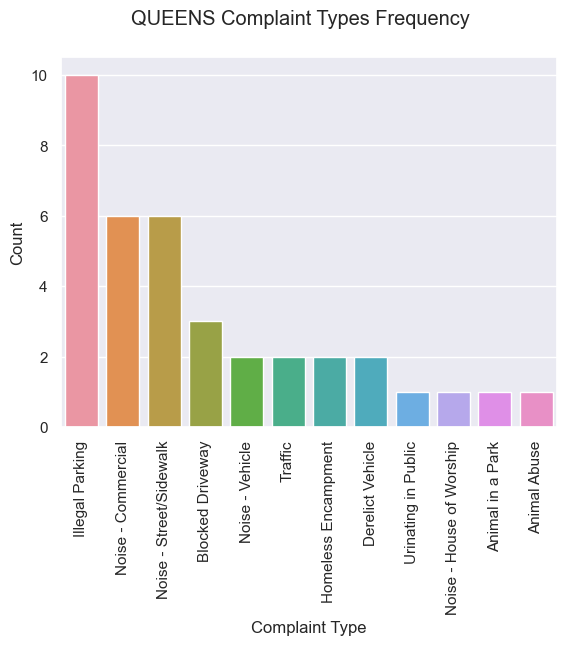

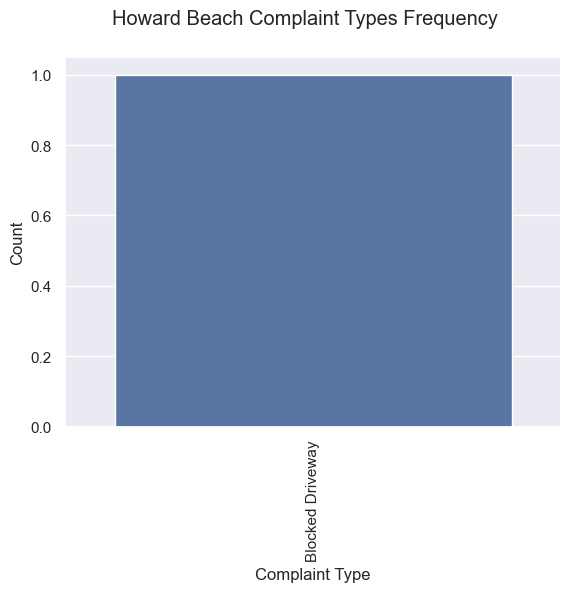

In [35]:
cities = city_complaint_df['City'].unique()
for c in cities:
    sns.barplot(data=city_complaint_df.loc[city_complaint_df['City'] == c], x='Complaint Type', y='Count')
    plt.xticks(rotation=90)
    plt.suptitle(f'{c} Complaint Types Frequency')
    plt.show()

## 4 - Visualize the Major Types of Complaints in Each City

In [36]:
print(city_complaint_df)

              Complaint Type            City  Count
0           Blocked Driveway        BROOKLYN  36241
1            Illegal Parking        BROOKLYN  33351
2    Noise - Street/Sidewalk        NEW YORK  22222
3         Noise - Commercial        NEW YORK  18627
4           Blocked Driveway           BRONX  16745
..                       ...             ...    ...
705                 Drinking     FLORAL PARK      1
704                  Vending      WHITESTONE      1
703                 Drinking    FOREST HILLS      1
702    Posting Advertisement  QUEENS VILLAGE      1
777    Posting Advertisement       RIDGEWOOD      1

[778 rows x 3 columns]


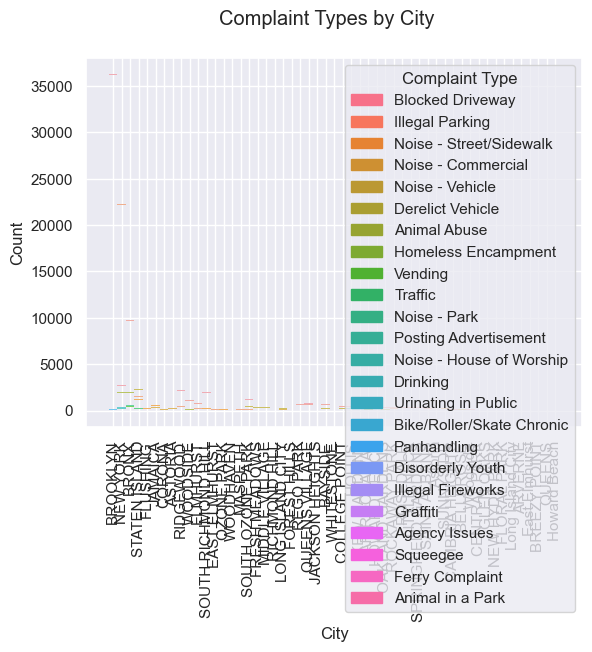

In [37]:
sns.histplot(data=city_complaint_df, x='City', y='Count', hue='Complaint Type', multiple='stack')
plt.xticks(rotation=90)
plt.suptitle('Complaint Types by City')
plt.show()

## 5 - Check the Average Response Time Across Various Complaint Types

In [38]:
# Create a new column for response time based on min time of 'Due Date', 'Resolution Action Updated Date', 'Closed Date'
df['Comp Time'] = df[['Due Date', 'Resolution Action Updated Date', 'Closed Date']].min(axis=1)
df['Response Time'] = df['Comp Time'] - df['Created Date']

In [39]:
df['Response Time'] = df['Response Time'].dt.seconds

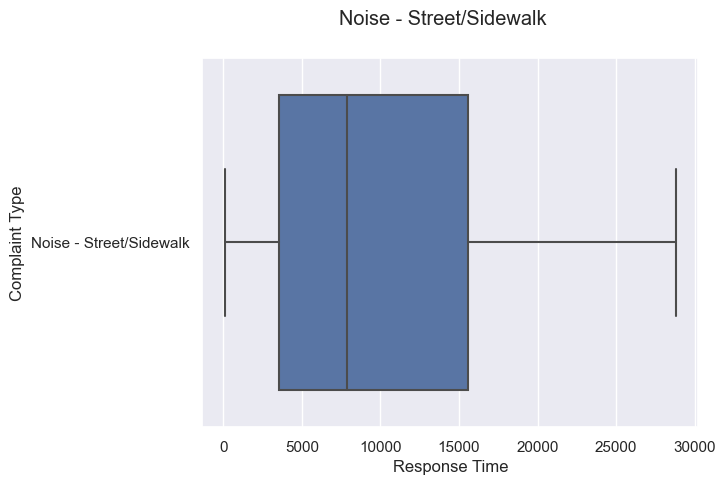

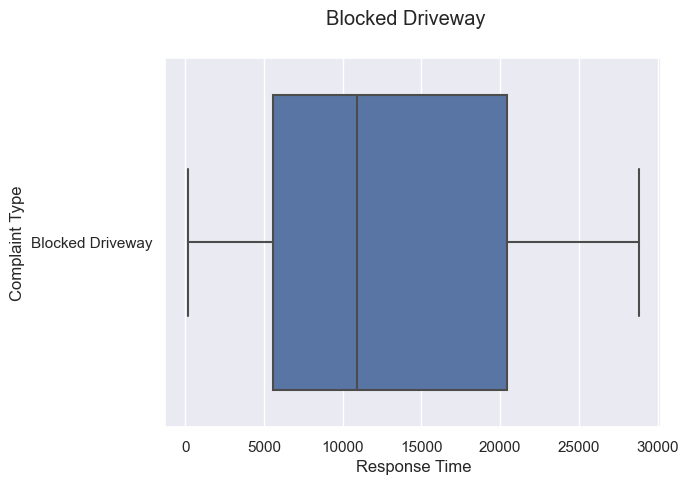

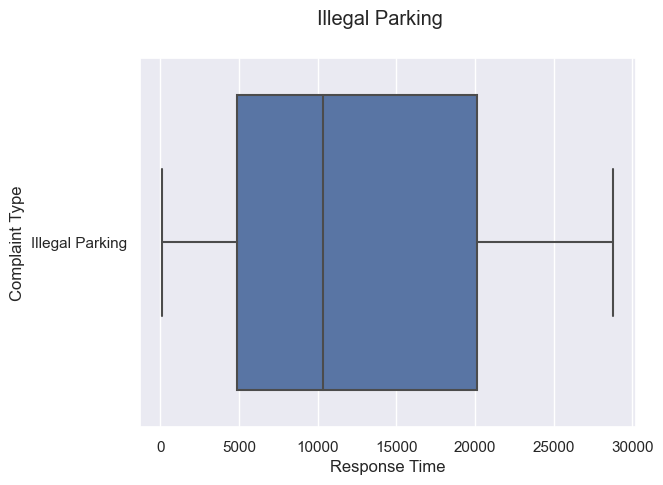

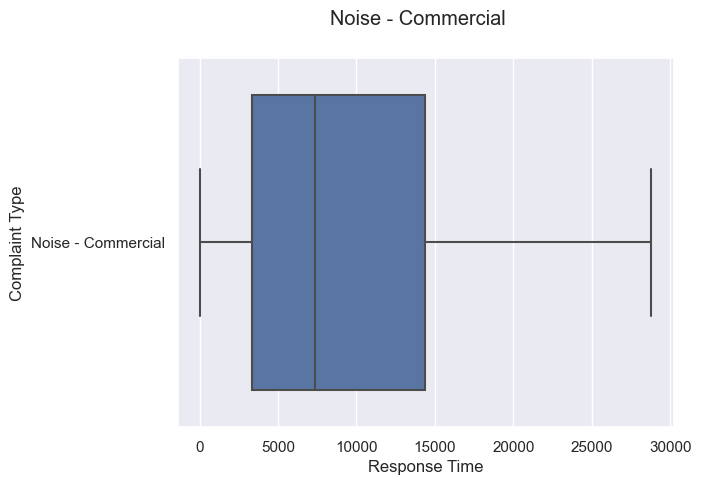

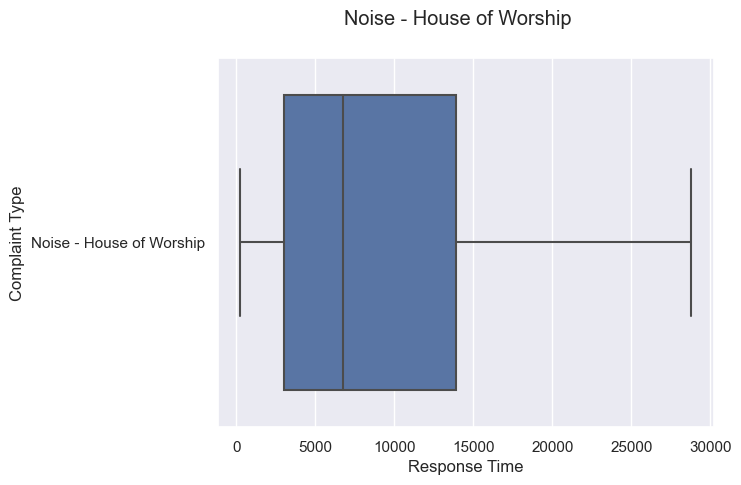

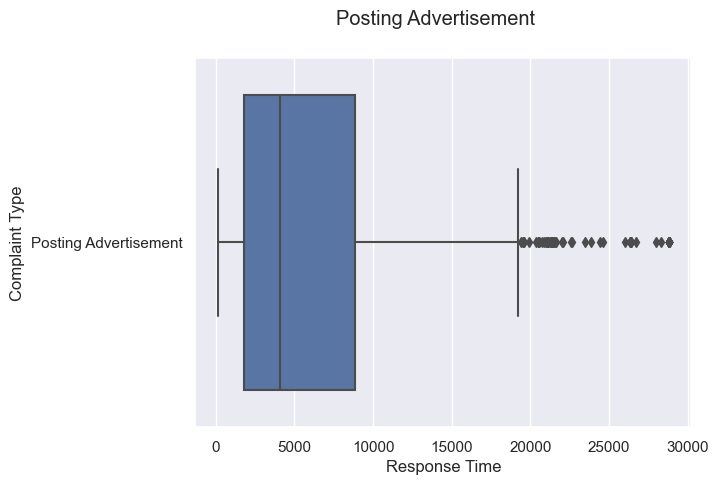

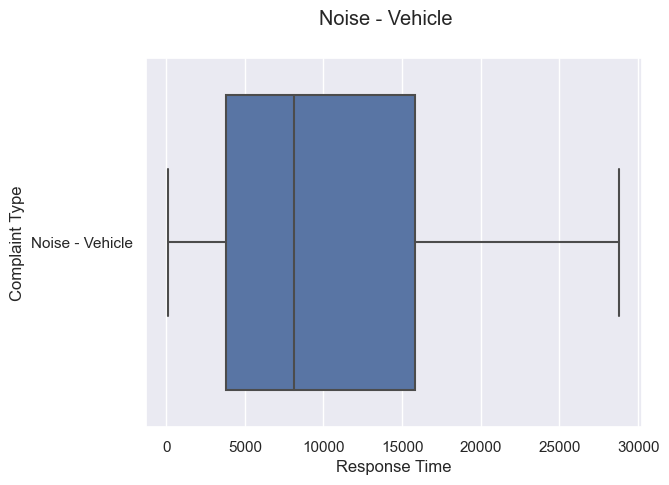

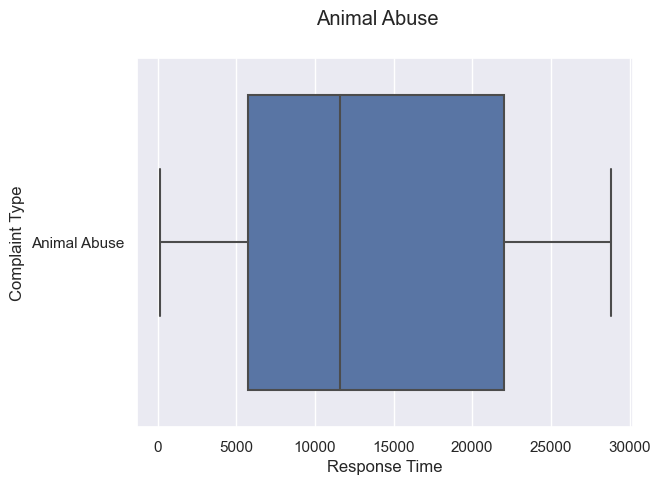

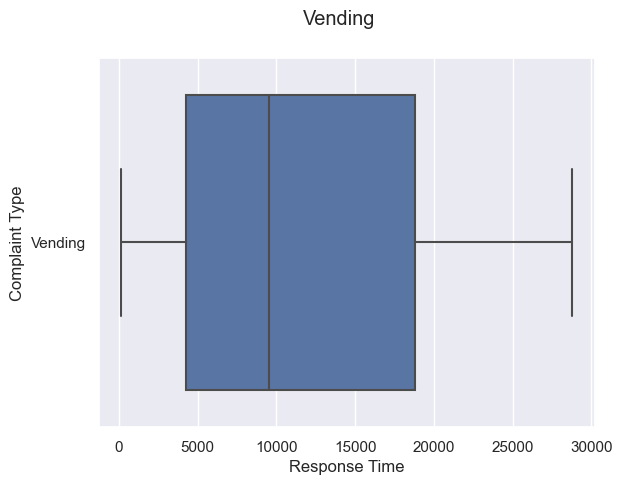

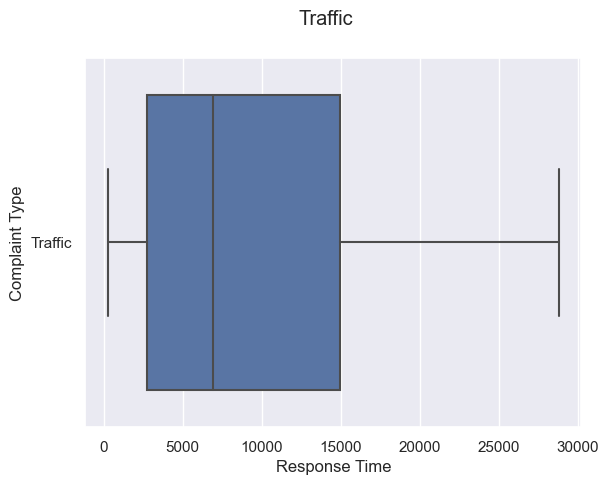

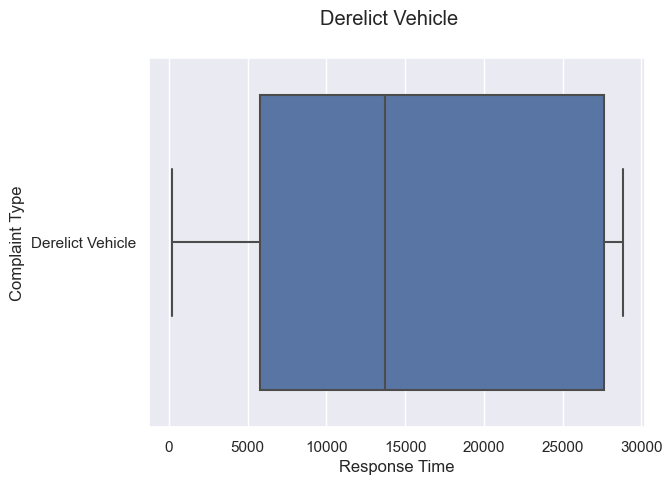

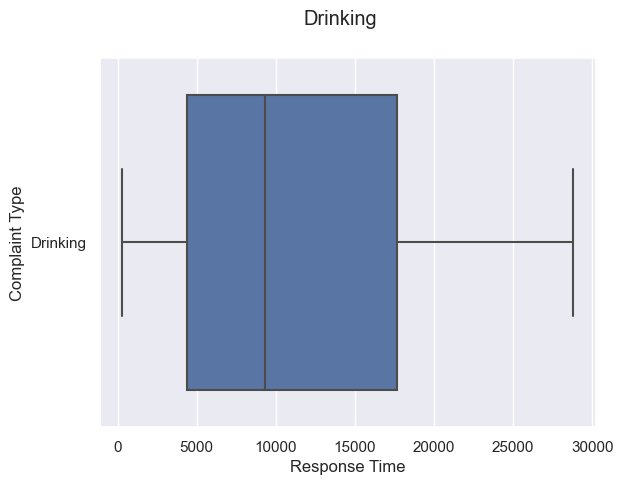

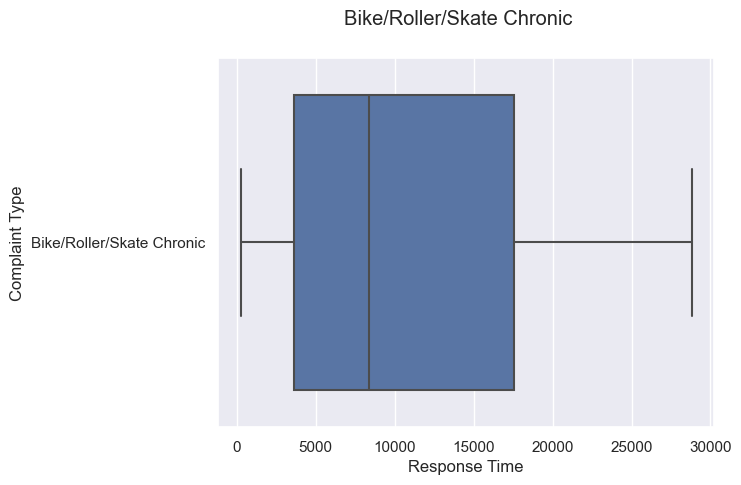

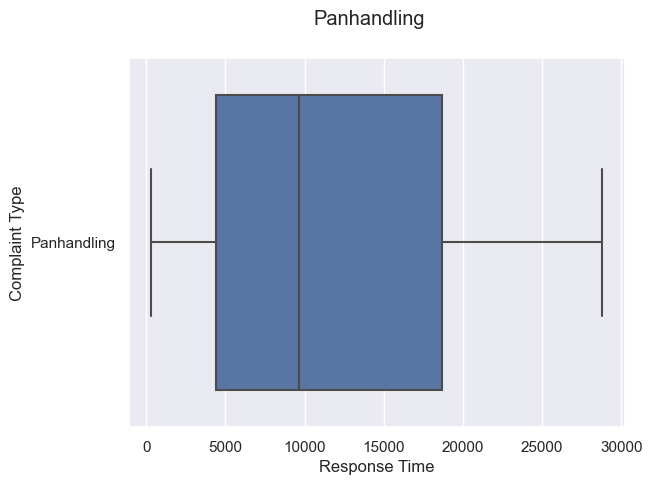

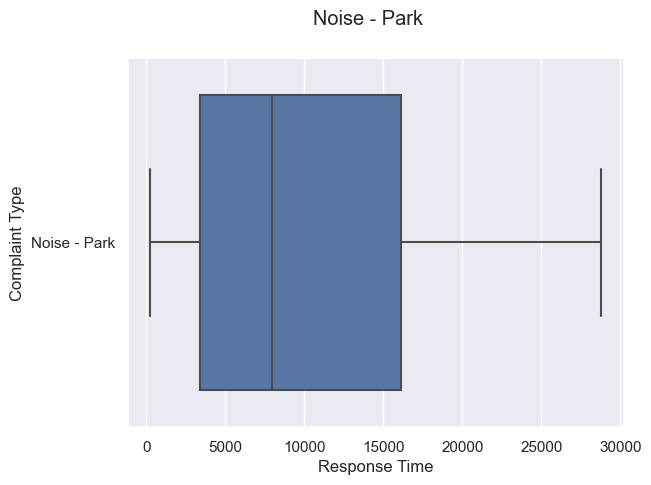

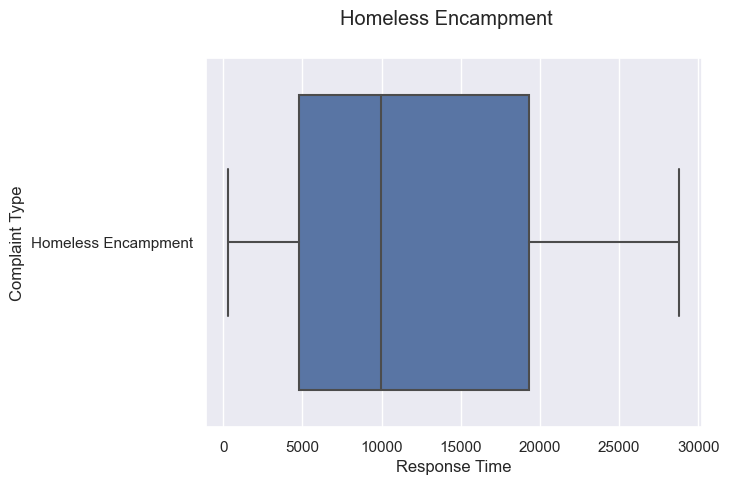

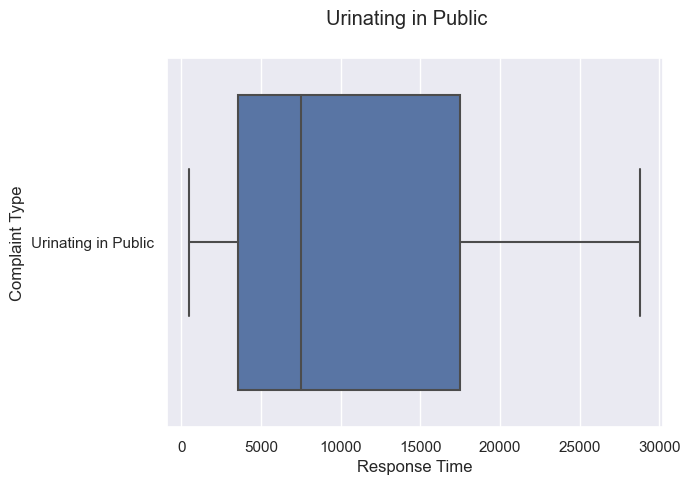

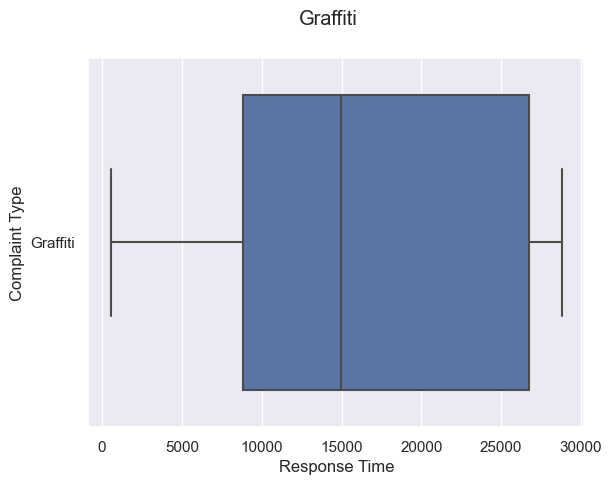

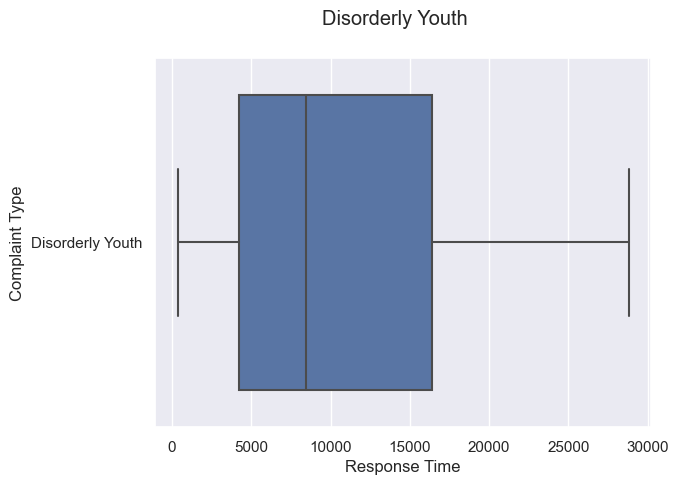

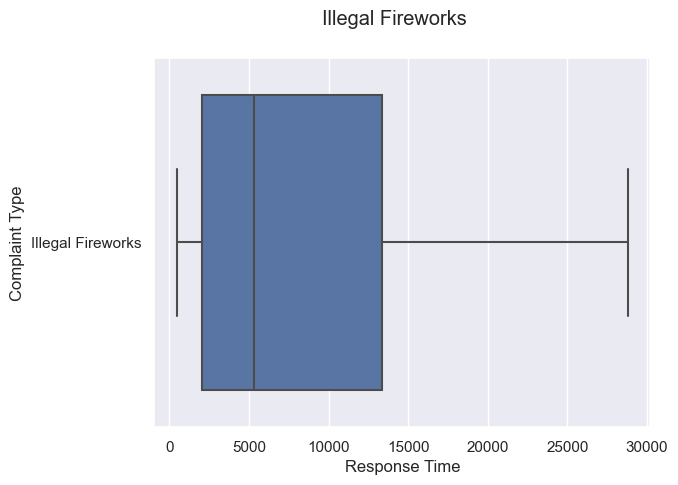

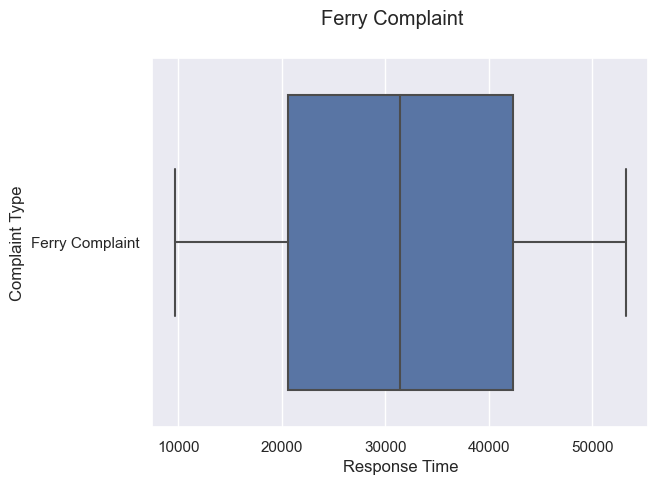

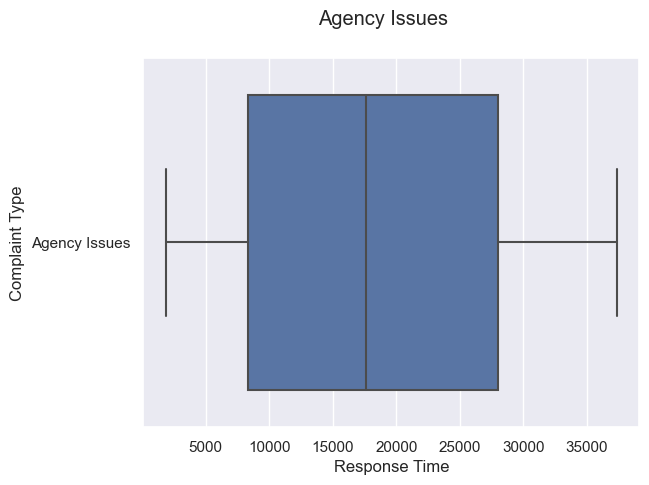

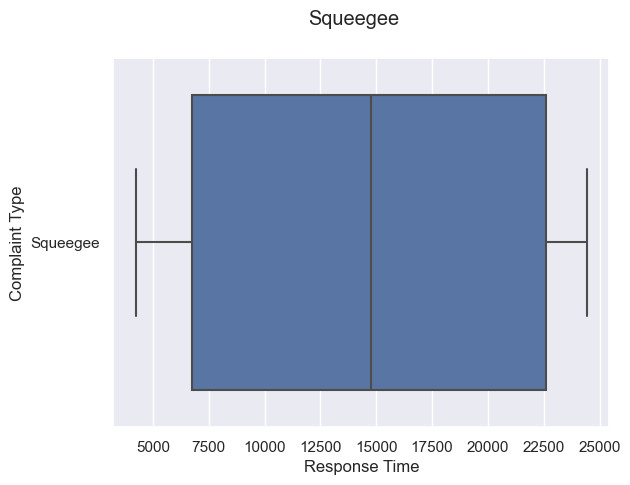

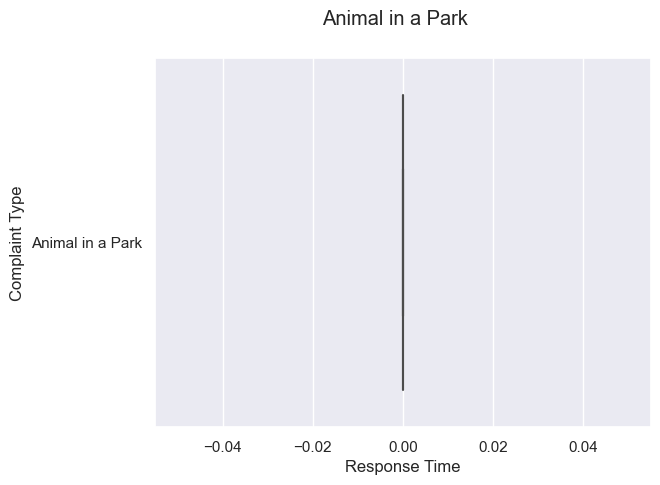

In [40]:
# Boxplot of response time by complaint type
for c in df['Complaint Type'].unique():
    sns.boxplot(data=df.loc[df['Complaint Type'] == c], y='Complaint Type', x='Response Time')
    plt.suptitle(c)
    plt.show()

                                   mean           std
Complaint Type                                       
Agency Issues              18256.375000  13322.936645
Animal Abuse               13831.375621   9374.495589
Animal in a Park               0.000000           NaN
Bike/Roller/Skate Chronic  11339.981053   9230.887784
Blocked Driveway           13290.591007   9072.046249
Derelict Vehicle           15256.125726  10171.036593
Disorderly Youth           10967.885714   8395.653501
Drinking                   11746.731863   8801.132019
Ferry Complaint            31467.000000  30800.157175
Graffiti                   16251.180645   9374.581793
Homeless Encampment        12539.393189   9157.667550
Illegal Fireworks           8833.005848   8802.628976
Illegal Parking            12854.603107   9323.066864
Noise - Commercial          9907.458176   8248.438641
Noise - House of Worship    9648.924015   8512.400647
Noise - Park               10726.541280   8829.956892
Noise - Street/Sidewalk    1

<AxesSubplot: xlabel='Complaint Type'>

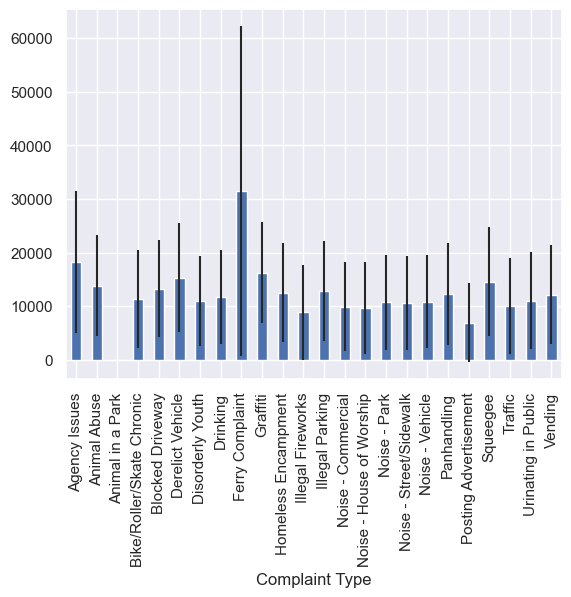

In [41]:
# Plot Average response time by complaint type
resp_time_group = df[['Complaint Type', 'Response Time']].groupby('Complaint Type').agg([np.mean, np.std])['Response Time']
print(resp_time_group)
resp_time_group.plot(kind='bar', y='mean', yerr='std', legend=False)

## 6 - Identify Significant Variables Using P-Values and Chi-Square Values

In [42]:
# Just going to assume we're trying to predict response time based on previous questions
# Create new Response time label to predict if a response will happen faster than average of the whole set
df['Quick Response'] = df['Response Time'] <= df['Response Time'].mean()

In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# df = df.drop(columns=['Unnamed: 0'])

dtypes = df.dtypes
# print(dtypes)

significant_cats = []
prob = 0.95

for col in dtypes.index.difference(['Unnamed: 0','Response Time','Unique Key','Quick Response']):
    contingency = pd.crosstab(df[col], df['Quick Response'])
    c, p, dof, expected = chi2_contingency(contingency)
    crit = chi2.ppf(prob, dof)
    chi_sig = abs(c) >= crit
    p_sig = p <= 1.0-prob
    print(f'\n\n{col}:\tChi-Squared={c} - Significant={chi_sig}\n\tP-Value={p}, significant={p_sig}')
    
    if chi_sig and p_sig:
        significant_cats.append(col)
        
print(f'\n\nSignificant Columns: {significant_cats}')



Address Type:	Chi-Squared=3297.5429185036637 - Significant=True
	P-Value=0.0, significant=True


Agency:	Chi-Squared=0.0 - Significant=False
	P-Value=1.0, significant=False


Agency Name:	Chi-Squared=3.177532735783438 - Significant=False
	P-Value=0.20417733615228806, significant=False


Borough:	Chi-Squared=10667.02508494075 - Significant=True
	P-Value=0.0, significant=True


Bridge Highway Direction:	Chi-Squared=53.6680252760747 - Significant=True
	P-Value=0.017239628088722314, significant=True


Bridge Highway Name:	Chi-Squared=41.204982131405366 - Significant=False
	P-Value=0.0660785277123527, significant=False


Bridge Highway Segment:	Chi-Squared=156.672871515518 - Significant=False
	P-Value=0.9422183323167732, significant=False


City:	Chi-Squared=14788.559874925762 - Significant=True
	P-Value=0.0, significant=True


Closed Date:	Chi-Squared=347425.6139026917 - Significant=True
	P-Value=1.316192151010255e-33, significant=True


Community Board:	Chi-Squared=29353.81783114242 - S